# Housing Project -Price Prediction


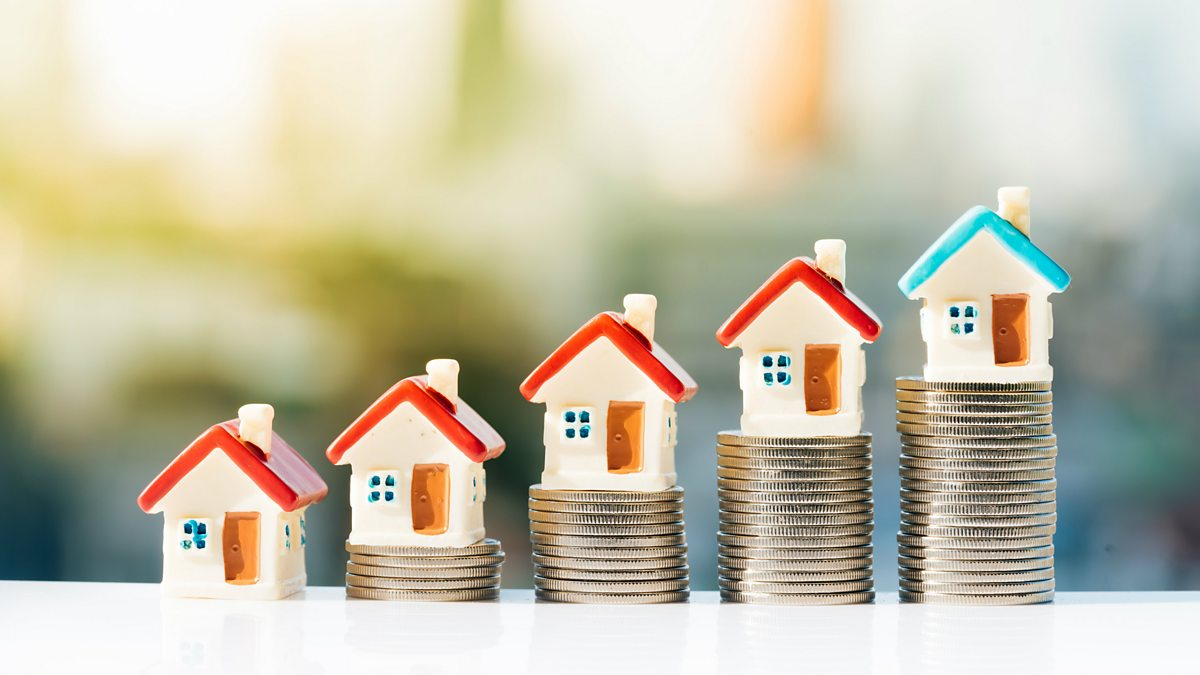


Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: Which variables are important to predict the price of variable? How do these variables describe the price of the house? ### Business Goal: #### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib_inline
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC,SVMSMOTE
from sklearn.preprocessing import power_transform,PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib


In [4]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

In [5]:
pd.set_option('display.max_rows',None)

Importing the Dataset:

In [6]:
df=pd.read_csv('House_Prediction_Train',sep="\t")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0  127         120       RL          NaN     4928   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story            6            5       1976          1976     Gable  CompShg     Plywood     Plywood       None         0.0        TA        TA     CBlock       Gd       TA           No          ALQ         120          Unf           0        958         1078    GasA        TA          Y      SBrkr       958         0             0        958             0             0         2         0             2             1          TA             5        Typ           1          TA     Attchd       1977.0          RFn           2         440         TA         TA          Y           0          205              0          0            0         0    NaN    NaN         NaN        0       2    2007       WD        Normal     128000
1  889          20       RL         95.0    15865   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story            8            6       1970          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd      PConc       TA       Gd           Gd          ALQ         351          Rec         823       1043         2217    GasA        Ex          Y      SBrkr      2217         0             0       2217             1             0         2         0             4             1          Gd             8        Typ           1          TA     Attchd       1970.0          Unf           2         621         TA         TA          Y          81          207              0          0          224         0    NaN    NaN         NaN        0      10    2007       WD        Normal     268000
2  793          60       RL         92.0     9920   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story            7            5       1996          1997     Gable  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA      PConc       Gd       TA           Av          GLQ         862          Unf           0        255         1117    GasA        Ex          Y      SBrkr      1127       886             0       2013             1             0         2         1             3             1          TA             8        Typ           1          TA     Attchd       1997.0          Unf           2         455         TA         TA          Y         180          130              0          0            0         0    NaN    NaN         NaN        0       6    2007       WD        Normal     269790
3  110          20       RL        105.0    11751   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story            6            6       1977          1977       Hip  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA     CBlock       Gd       TA           No          BLQ         705          Unf           0       1139        

In [7]:
df.sample(7)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
11    833          60       RL         44.0     9548   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            6       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       223.0        Gd        TA      PConc       Gd       TA           No          GLQ         483          Unf           0        458          941    GasA        Ex          Y      SBrkr       941       888             0       1829             1             0         2         1             3             1          Gd             7        Typ           1          TA     Attchd       2003.0          RFn           2         613         TA         TA          Y         192           39              0          0            0         0    NaN    NaN         NaN        0       1    2010       WD        Normal     237000
1116  123          20       RL         75.0     9464   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            7       1958          1958       Hip  CompShg     MetalSd     MetalSd    BrkFace       135.0        TA        Gd     CBlock       TA       TA           No          BLQ         570          Unf           0        510         1080    GasA        Gd          Y      SBrkr      1080         0             0       1080             0             0         1         0             3             1          TA             5        Typ           0         NaN     Attchd       1958.0          Unf           1         288         TA         TA          Y           0            0              0          0          130         0    NaN    NaN         NaN        0       6    2008       WD        Normal     136000
1006  480          30       RM         50.0     5925   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl      OldTown       Norm       Norm     1Fam     1Story            4            7       1937          2000       Hip  CompShg      Stucco      Stucco     BrkCmn       435.0        TA        TA     BrkTil       Fa       TA           No          Rec         168          Unf           0        739          907    GasA        TA          Y      SBrkr      1131         0             0       1131             0             0         1         0             2             1          TA             7        Typ           0         NaN     Detchd       1995.0          Unf           2         672         TA         TA          Y           0           72              0          0            0         0    NaN  MnPrv         NaN        0       3    2007       WD        Alloca      89471
229   909          20       RL          NaN     8885   Pave   NaN      IR1         Low    AllPub    Inside       Mod      Mitchel       Norm       Norm     1Fam     1Story            5            5       1983          1983     Gable  CompShg     HdBoard     HdBoard       None         0.0        TA        TA     CBlock       Gd       TA           Av          BLQ         301          ALQ         324       

In [8]:
ds=pd.read_csv('House_Prediction_Test',sep="\t")
ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
0   337          20       RL         86.0    14157   Pave   NaN      IR1         HLS    AllPub    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story            9            5       2005          2006       Hip  CompShg     VinylSd     VinylSd      Stone       200.0        Gd        TA      PConc       Ex       TA           Gd          GLQ        1249          Unf           0        673         1922    GasA        Ex          Y      SBrkr      1922         0             0       1922             1             0         2         0             3             1          Gd             8        Typ           1          Gd     Attchd       2005.0          Fin           3         676         TA         TA          Y         178           51              0          0            0         0     NaN   NaN         NaN        0       7    2007       WD        Normal
1  1018         120       RL          NaN     5814   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story            8            5       1984          1984     Gable  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA     CBlock       Gd       TA           Av          GLQ        1036          Unf           0        184         1220    GasA        Gd          Y      SBrkr      1360         0             0       1360             1             0         1         0             1             1          Gd             4        Typ           1          Ex     Attchd       1984.0          RFn           2         565         TA         TA          Y          63            0              0          0            0         0     NaN   NaN         NaN        0       8    2009      COD       Abnorml
2   929          20       RL          NaN    11838   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story            8            5       2001          2001       Hip  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA      PConc       Gd       TA           Av          Unf           0          Unf           0       1753         1753    GasA        Ex          Y      SBrkr      1788         0             0       1788             0             0         2         0             3             1          Ex             7        Typ           1          TA     Attchd       2001.0          RFn           2         522         TA         TA          Y         202          151              0          0            0         0     NaN   NaN         NaN        0       6    2009       WD        Normal
3  1148          70       RL         75.0    12000   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            7       1941          1950     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       TA       TA           No          Rec         275          Unf           0        429          704    GasA        Ex          Y      

In [9]:
ds.sample(8)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
85   1032          75       RL        102.0    15863   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl        SWISU       Norm       Norm     1Fam     2.5Fin            7            3       1920          1970     Gable  CompShg     Wd Sdng     Plywood       None         0.0        TA        TA     BrkTil       TA       TA           No          GLQ         523          Unf           0        301          824    GasA        Ex          Y      SBrkr      1687       998           397       3082             1             0         2         1             5             1          TA            12        Typ           2          TA    Basment       1970.0          Fin           2         672         TA         TA          Y         136           63              0          0            0         0     NaN    NaN         NaN        0       8    2009       WD        Normal
31    937          20       RL         67.0    10083   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      SawyerW       Norm       Norm     1Fam     1Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd        NaN         NaN        Gd        TA      PConc       Gd       TA           No          GLQ         833          Unf           0        343         1176    GasA        Ex          Y      SBrkr      1200         0             0       1200             1             0         2         0             2             1          Gd             5        Typ           0         NaN     Attchd       2003.0          RFn           2         555         TA         TA          Y           0           41              0          0            0         0     NaN    NaN         NaN        0       8    2009       WD        Normal
134  1060          50       RL          NaN    11275   Pave   NaN      IR1         HLS    AllPub    Corner       Mod      Crawfor       Norm       Norm     1Fam     1.5Fin            6            7       1932          1950     Gable  CompShg     MetalSd     MetalSd    BrkFace       480.0        TA        TA     CBlock       TA       TA           Mn          Rec         297          LwQ         557          0          854    GasA        TA          Y      SBrkr      1096       895             0       1991             0             0         1         1             3             1          TA             7        Typ           1          Gd     Detchd       1977.0          Unf           2         432         TA         Fa          Y           0            0             19          0            0         0     NaN    NaN         NaN        0       3    2007       WD        Normal
72   1415          50       RL         64.0    13053   Pave  Pave      Reg         Bnk    AllPub    Inside       Gtl      BrkSide       Norm       Norm     1Fam     1.5Fin            6            7       1923          2000   Gambrel  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA        TA     BrkTil       TA       TA           No          Unf           0          Unf           0        833          833    GasA        Gd     

In [10]:
df.columns    # checking the variables in column section.

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  


<span class="burk">Dataframe Description:</span>

in the above dataset the target is to predict the Sale price of the house:

In [11]:
df.info()  #Checking the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [12]:
ds.info()  #Checking the information about test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [13]:
df.shape #checking the data dimension

(1168, 81)

We have 1168 rows and 81 columns including the target column.

In [14]:
ds.shape #checking the data dimension

(292, 80)

We have 292 rows and 80 columns excluding the target column.

In [15]:
df['SalePrice'].value_counts() # checking the value counts of Target variable

140000    18
135000    16
155000    12
139000    11
160000    11
145000    10
190000     9
130000     9
110000     9
125000     8
215000     8
129000     8
127000     8
115000     8
147000     8
185000     8
200000     7
128000     7
141000     7
175000     7
180000     7
176000     7
144000     7
230000     7
235000     7
100000     7
165000     7
173000     6
108000     6
170000     6
174000     6
205000     6
132500     6
148000     6
225000     5
158000     5
187500     5
137000     5
260000     5
239000     5
157000     5
250000     5
181000     5
240000     5
120000     5
124000     5
136500     5
152000     5
290000     5
143000     5
151000     5
178000     5
133000     5
172500     5
119000     4
184000     4
168000     4
191000     4
214000     4
163000     4
325000     4
137500     4
150000     4
127500     4
192000     4
171000     4
275000     4
207500     4
112000     4
118500     4
120500     4
132000     4
113000     4
123000     4
149900     4
189000     4
124500     4

Making Dataframe of the Nominal data

In [16]:
df_visualization_nominal=df[['Street', 'Alley','LotShape','Utilities','LandContour','LotConfig','LandSlope',
                             'RoofStyle','RoofMatl','MasVnrType','Heating','Electrical','CentralAir',
                             'Functional','GarageFinish','PavedDrive','MiscFeature',]].copy()

In [17]:
df_visualization_nominal.columns

Index(['Street', 'Alley', 'LotShape', 'Utilities', 'LandContour', 'LotConfig', 'LandSlope', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Heating', 'Electrical', 'CentralAir', 'Functional', 'GarageFinish', 'PavedDrive', 'MiscFeature'], dtype='object')

<span class="burk">Visualization of the Data:</span>

For the nominal categorical data we will use countplot as it will give the frequency of the classes of columns:

Pave    1164
Grvl       4
Name: Street, dtype: int64


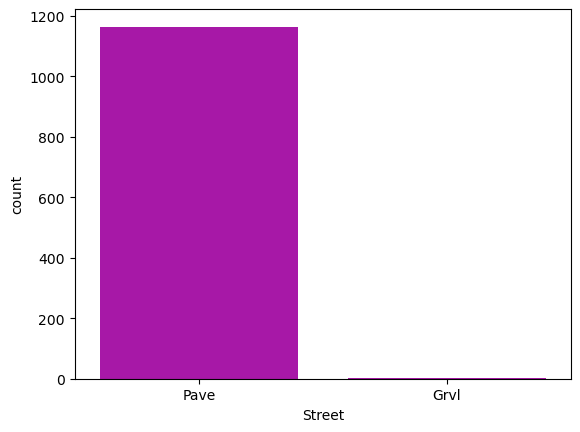

In [18]:
Js = sns.countplot(x="Street",data=df_visualization_nominal,color="m")
print(df_visualization_nominal["Street"].value_counts())

From the above observation the total number of road access to the property for paved and gravel is 1164 and 4 respectively.

Grvl    41
Pave    36
Name: Alley, dtype: int64


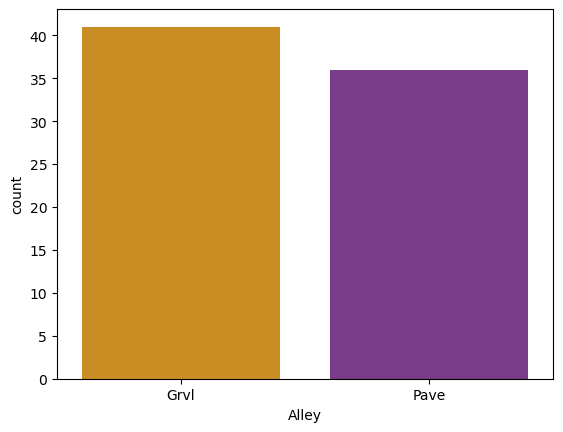

In [19]:
Js = sns.countplot(x="Alley",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["Alley"].value_counts())

From the above observation the total number of alley access to the property for paved and gravel is 36 and 41 respectively.

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


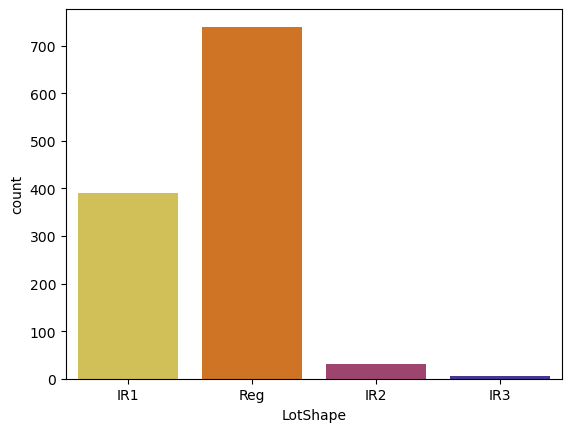

In [20]:
Js = sns.countplot(x="LotShape",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["LotShape"].value_counts())

From the above observation the total number of shape of property for regular, slightly regular, moderately regualar, irregualar is 740,390,32 and 6 respectively.

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


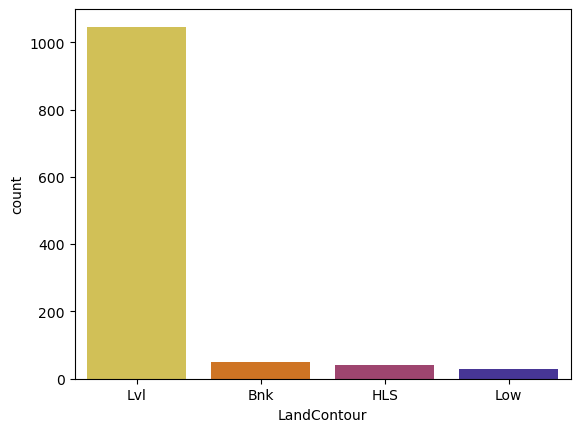

In [21]:
Js = sns.countplot(x="LandContour",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["LandContour"].value_counts())

From the above observation the total number of flatness of the property for level, banked, hillside and depression is 1046,50,42 and 30 respectively.

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


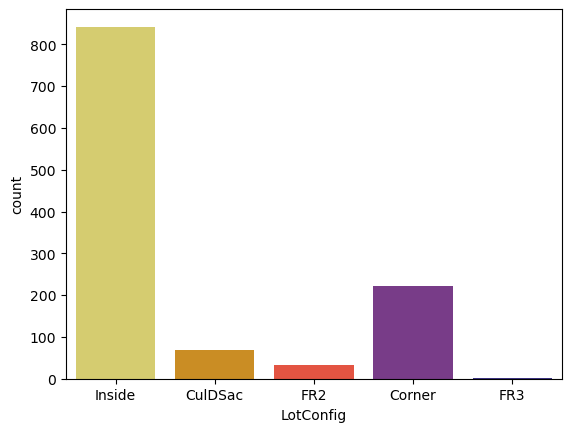

In [22]:
Js = sns.countplot(x="LotConfig",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["LotConfig"].value_counts())

From the above observation the total number of lot configuration of the property for inside, corner, CulDScac, frontage 2 and frontage 3 is 842, 222, 69, 33 and 2 respectively.

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


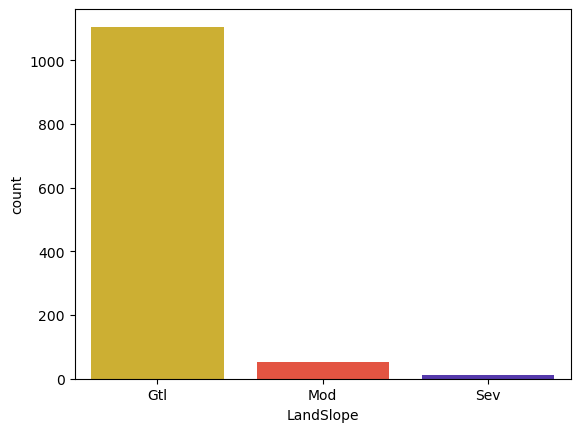

In [23]:
Js = sns.countplot(x="LandSlope",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["LandSlope"].value_counts())

From the above observation the total number of land slope of the property for gentle, moderate and severe slope is 1105, 51 and 12 respectively.

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


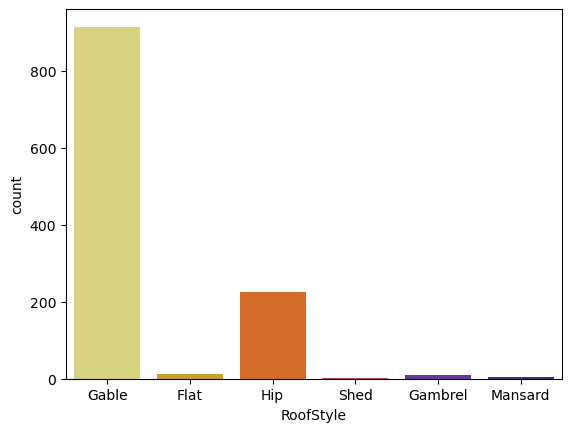

In [24]:
Js = sns.countplot(x="RoofStyle",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["RoofStyle"].value_counts())

From the above observation the total number of roof style of the property for flat, gable, gambrel, hip, mansard and shed is 12, 9, 225, 5 and 2 respectively.

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


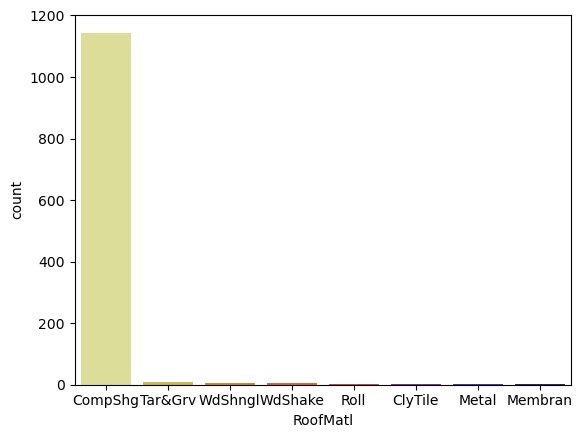

In [25]:
Js = sns.countplot(x="RoofMatl",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["RoofMatl"].value_counts())

From the above observation the total number of roof material of the property for tile, composite, membrane, roll, garvel, wood shakes and wood shingles is 1, 1144, 1, 1, 1, 10, 4 and 6 respectively.

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


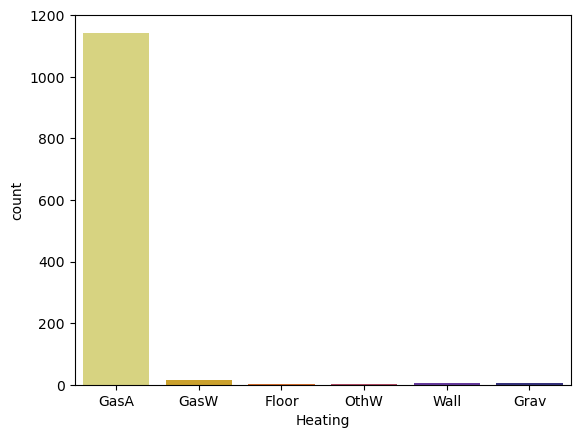

In [26]:
Js = sns.countplot(x="Heating",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["Heating"].value_counts())

From the above observation the total number of heating of the property for floor furnance, gas forced warm air furnance gas hot water, gravity furnance , hot water and wall furnance is 1, 1143, 14, 5, 1 and 4 respectively.

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


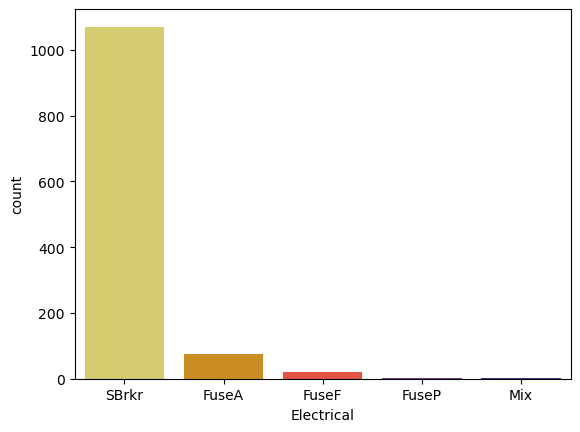

In [27]:
Js = sns.countplot(x="Electrical",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["Electrical"].value_counts())

From the above observation the total number of electrical sysytem of the property for standard circuit breaker & romex, average fuse box, fair fuse box, poor fuse box and mixed is 1070, 74, 21, 2 and 1 respectively.

Y    1090
N      78
Name: CentralAir, dtype: int64


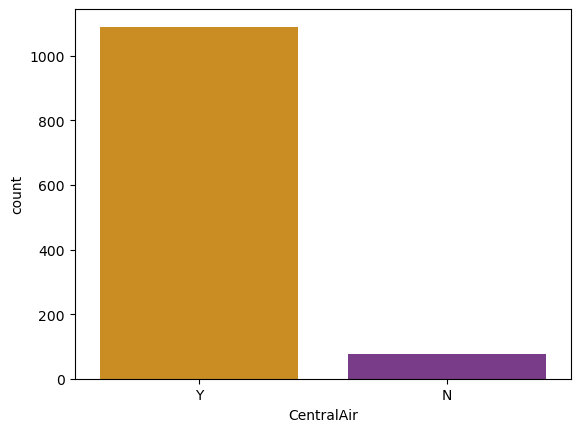

In [28]:
Js = sns.countplot(x="CentralAir",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["CentralAir"].value_counts())

From the above observation the total number of cnetral air conditioning of the property has 1090 of 1168

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


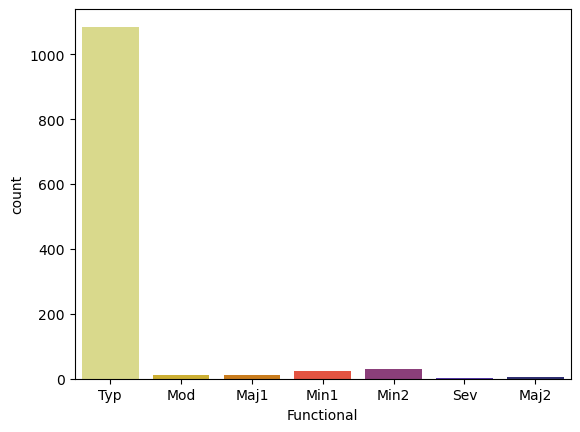

In [29]:
Js = sns.countplot(x="Functional",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["Functional"].value_counts())

From the above observation the total number of home functionality of the property for typical functionality, minor deduction 1, minor deduction 2, moderate deduction, major deduction 1, major deduction 2, severally damaged and salvage only is 1085, 30, 25, 12, 11, 4 and 1 respectively.

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


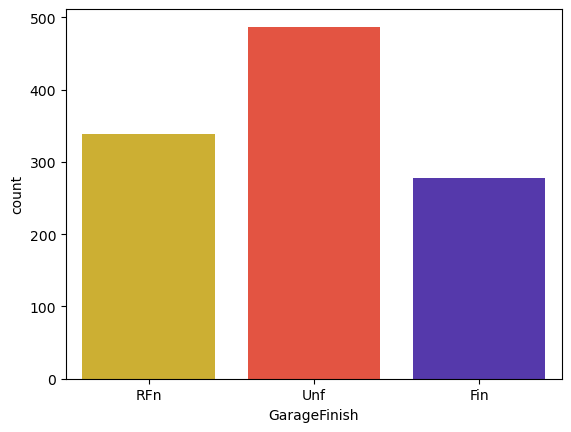

In [30]:
Js = sns.countplot(x="GarageFinish",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["GarageFinish"].value_counts())

From the above observation the total number of garage finish of the property for finished, rough finished, unfinished is 278, 339, and 487 respectively.

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


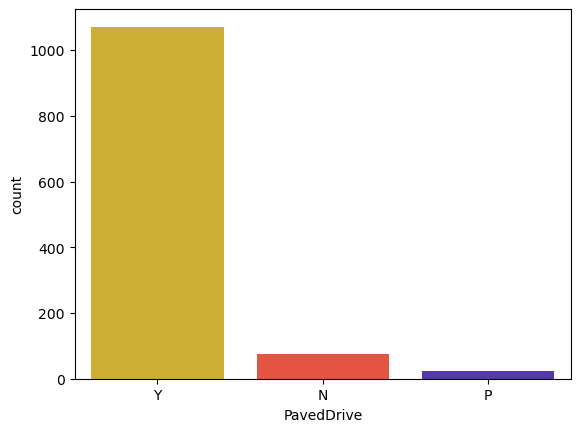

In [31]:
Js = sns.countplot(x="PavedDrive",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["PavedDrive"].value_counts())

From the above observation the total number of paved driveway of the property for paved, partial pavement and gravel is 1071, 23 and 74 respectively.

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64


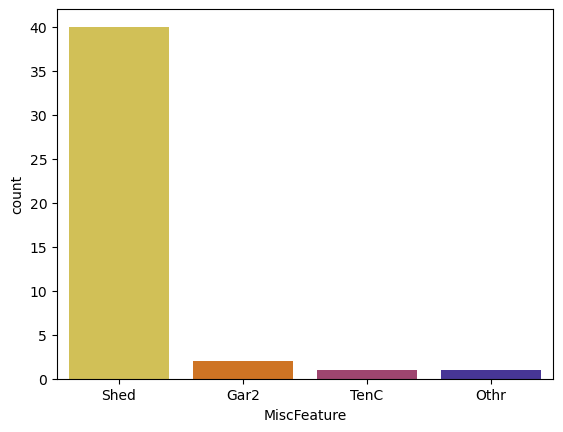

In [32]:
Js = sns.countplot(x="MiscFeature",data=df_visualization_nominal,palette='CMRmap_r')
print(df_visualization_nominal["MiscFeature"].value_counts())

From the above observation the total number of miscellaneous features not covered in other categories of the property for 2nd garage, other, shed and tennis court is 2, 1, 40 and 1 respectively.

For the ordinal categorical data we will use lineplot as it will give the flow of the line of the classes of the columns:

Making Dataframe of the Ordinal data

In [33]:
df_visualization_ordinal=df[['MSZoning','BldgType','OverallQual','OverallCond','BsmtQual', 'BsmtCond',
                             'BsmtExposure','HeatingQC','FireplaceQu','KitchenQual','GarageQual','GarageCond',
                             'PoolQC','SaleType','SaleCondition',]].copy()

In [34]:
df_visualization_ordinal.columns

Index(['MSZoning', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'FireplaceQu', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC', 'SaleType', 'SaleCondition'], dtype='object')

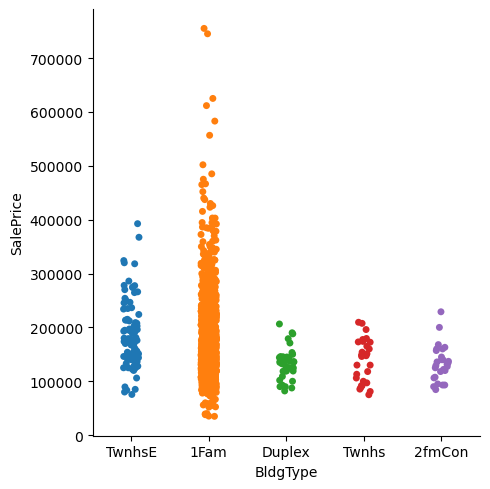

In [35]:
sns.catplot(x="BldgType",y="SalePrice", data=df)

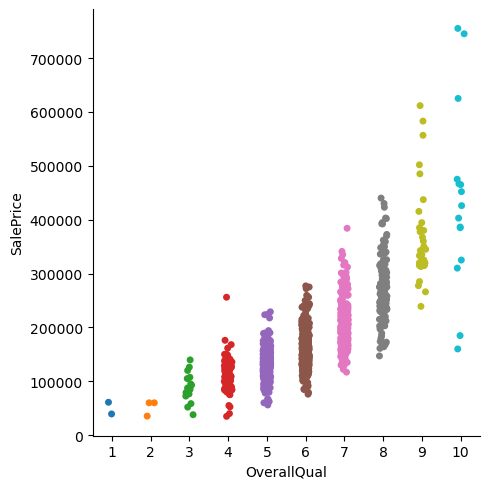

In [36]:
sns.catplot(x="OverallQual",y="SalePrice", data=df)

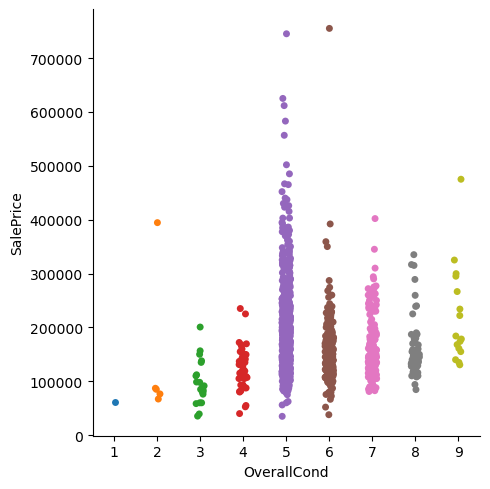

In [37]:
sns.catplot(x="OverallCond",y="SalePrice", data=df)

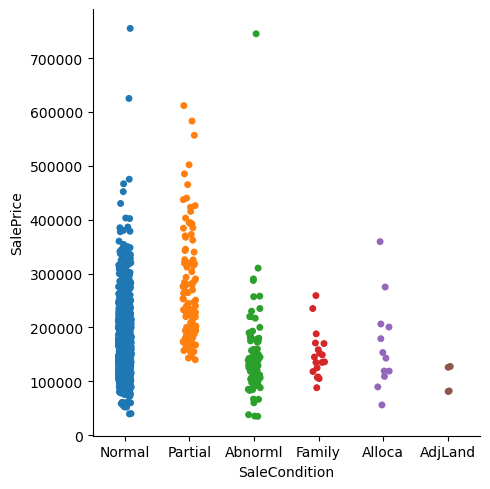

In [38]:
sns.catplot(x="SaleCondition",y="SalePrice", data=df)

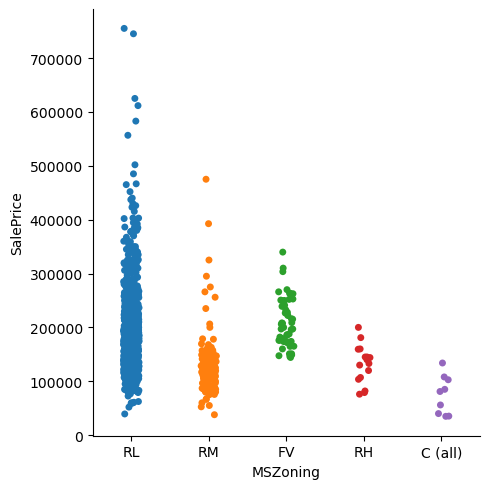

In [39]:
sns.catplot(x="MSZoning",y="SalePrice", data=df)

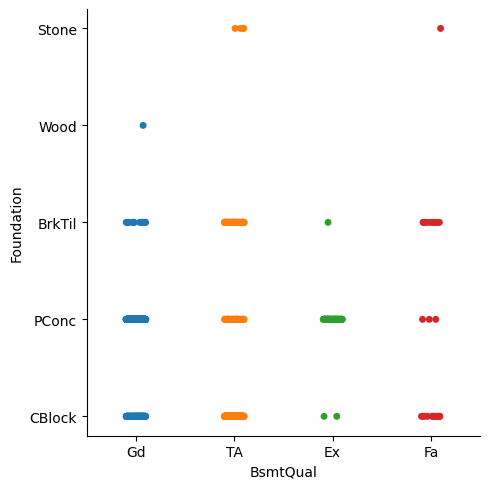

In [40]:
sns.catplot(x="BsmtQual",y="Foundation", data=df)

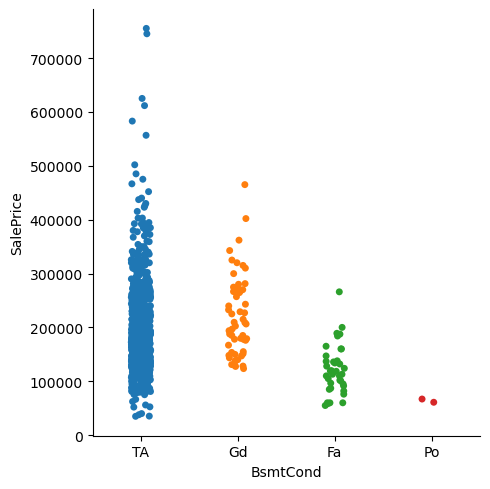

In [41]:
sns.catplot(x="BsmtCond",y="SalePrice", data=df)

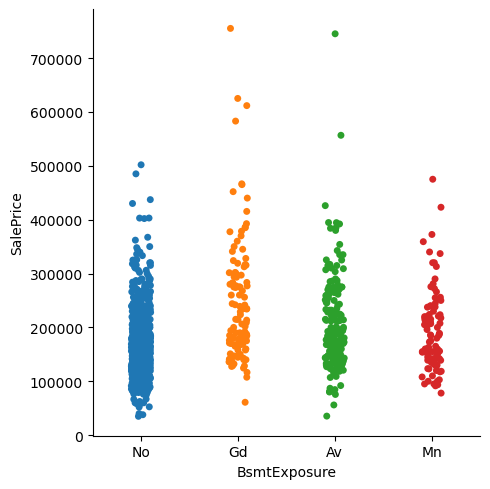

In [42]:
sns.catplot(x="BsmtExposure",y="SalePrice", data=df)

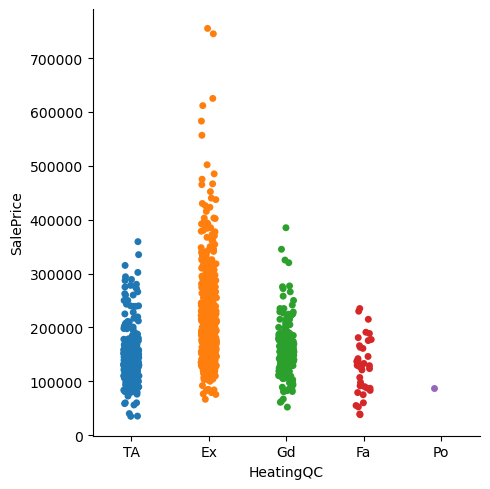

In [43]:
sns.catplot(x="HeatingQC",y="SalePrice", data=df)

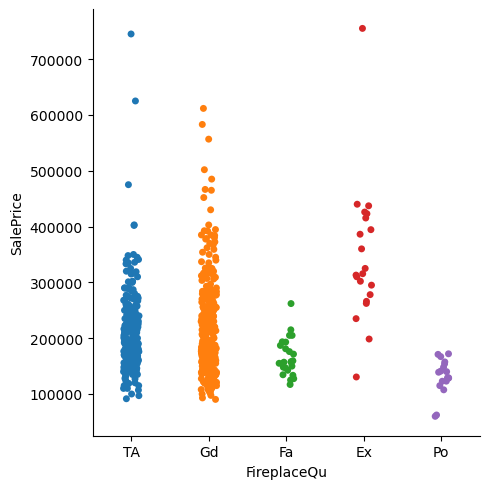

In [44]:
sns.catplot(x="FireplaceQu",y="SalePrice", data=df)

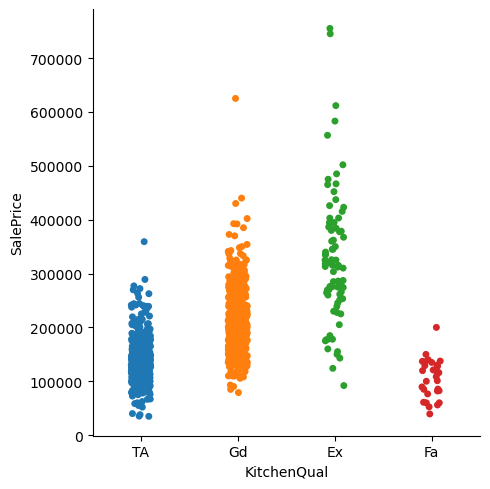

In [45]:
sns.catplot(x="KitchenQual",y="SalePrice", data=df)

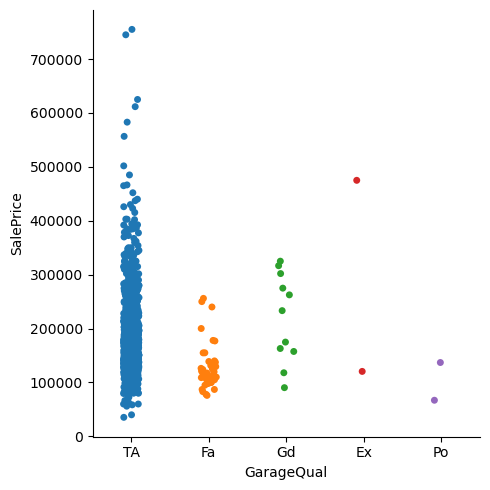

In [46]:
sns.catplot(x="GarageQual",y="SalePrice", data=df)

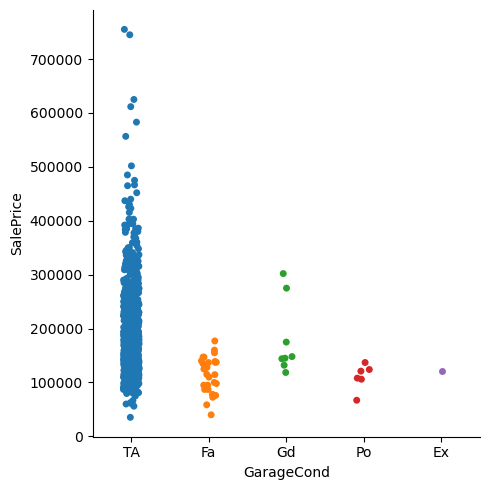

In [47]:
sns.catplot(x="GarageCond",y="SalePrice", data=df)

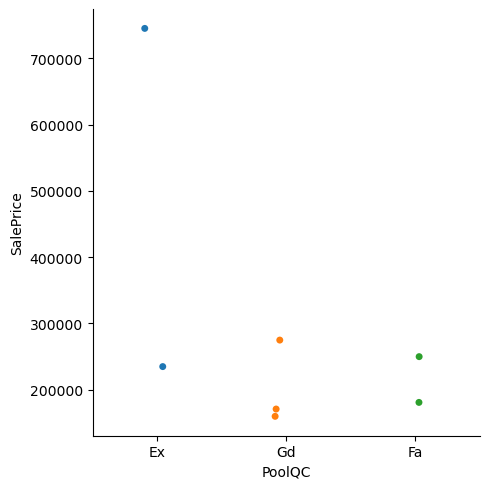

In [48]:
sns.catplot(x="PoolQC",y="SalePrice", data=df)

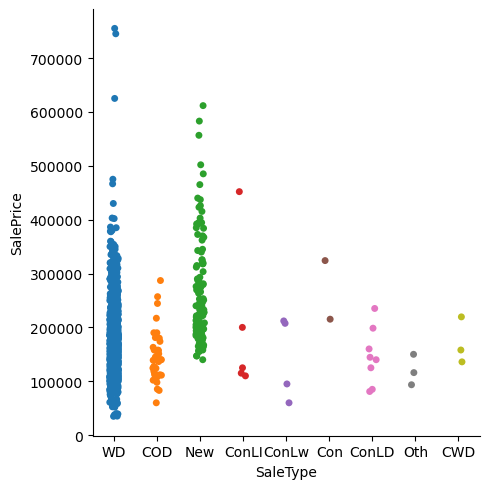

In [49]:
sns.catplot(x="SaleType",y="SalePrice", data=df)

Checking the distribution of the continuous value of float type columns:

In [50]:
df_visualization_continuous=df[['LotFrontage', 'LotArea','YearBuilt','GrLivArea', 'GarageYrBlt','MoSold', 'YrSold',
                                'SalePrice']].copy()

In [51]:
df_visualization_continuous.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

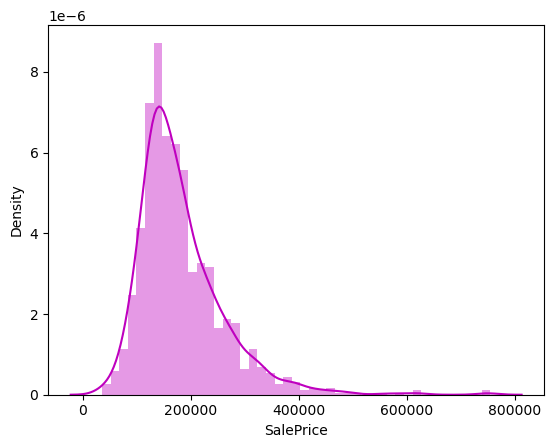

In [52]:
sns.distplot(df_visualization_continuous["SalePrice"], kde=True,color='m')

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

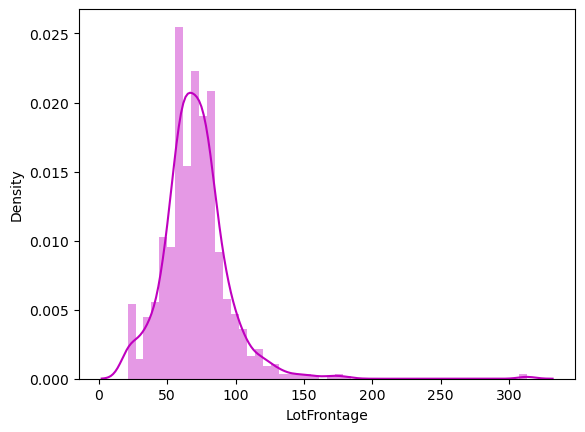

In [53]:
sns.distplot(df_visualization_continuous["LotFrontage"], kde=True,color='m')

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

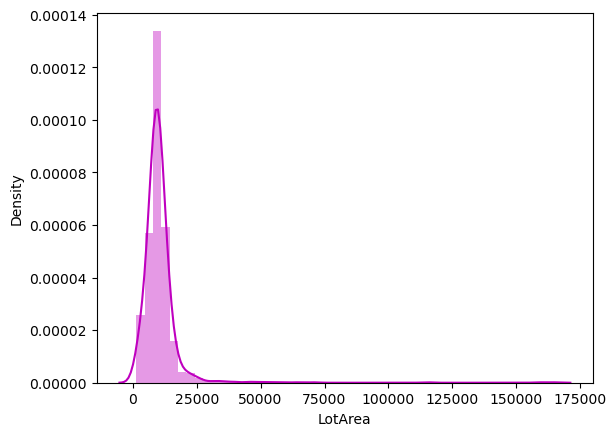

In [54]:
sns.distplot(df_visualization_continuous["LotArea"], kde=True,color='m')

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

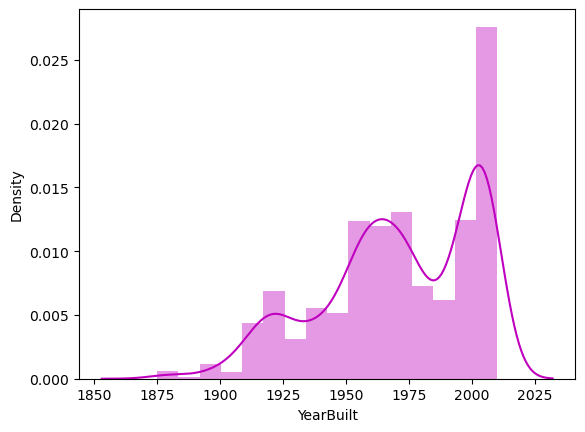

In [55]:
sns.distplot(df_visualization_continuous["YearBuilt"], kde=True,color='m')

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

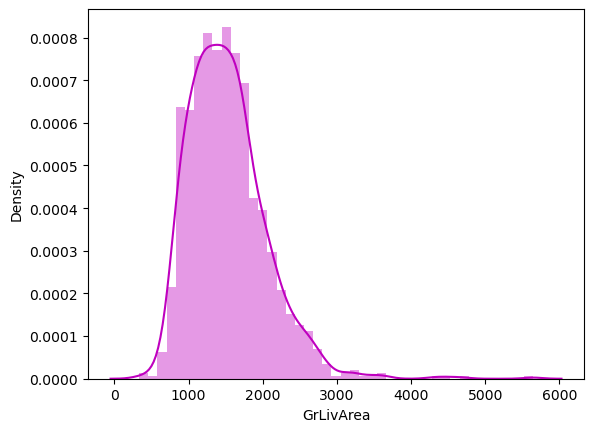

In [56]:
sns.distplot(df_visualization_continuous["GrLivArea"], kde=True,color='m')

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

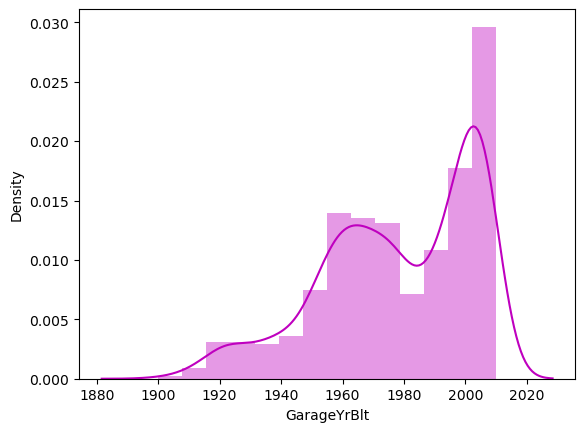

In [57]:
sns.distplot(df_visualization_continuous["GarageYrBlt"], kde=True,color='m')

<AxesSubplot:xlabel='MoSold', ylabel='Density'>

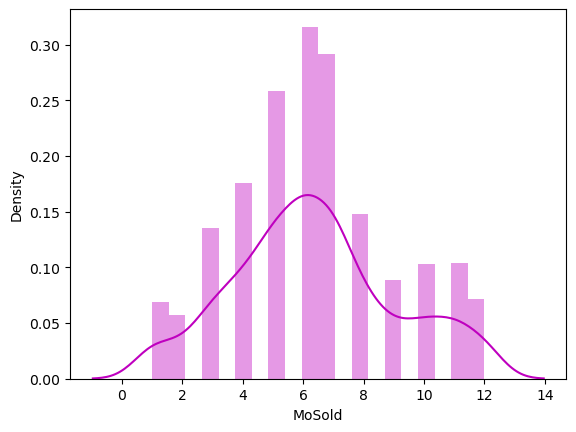

In [58]:
sns.distplot(df_visualization_continuous["MoSold"], kde=True,color='m')

<AxesSubplot:xlabel='YrSold', ylabel='Density'>

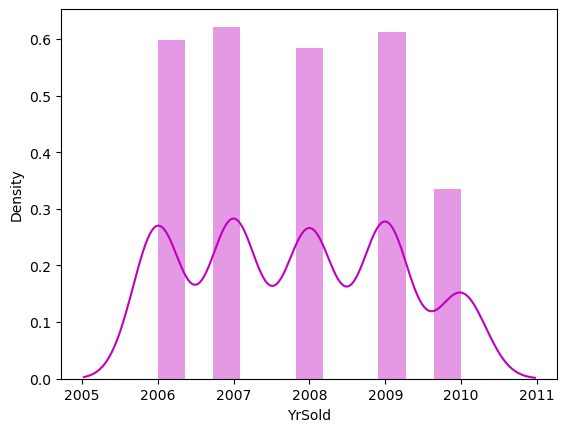

In [59]:
sns.distplot(df_visualization_continuous["YrSold"], kde=True,color='m')

Violinplot Display distribution of Target variable.

<AxesSubplot:xlabel='SalePrice'>

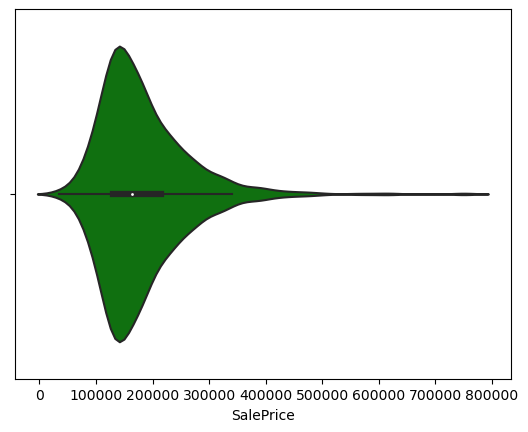

In [60]:
sns.violinplot(x='SalePrice',data=df, split=True,color='g')

Boxplot Display distribution of Target variable.

<AxesSubplot:xlabel='SalePrice'>

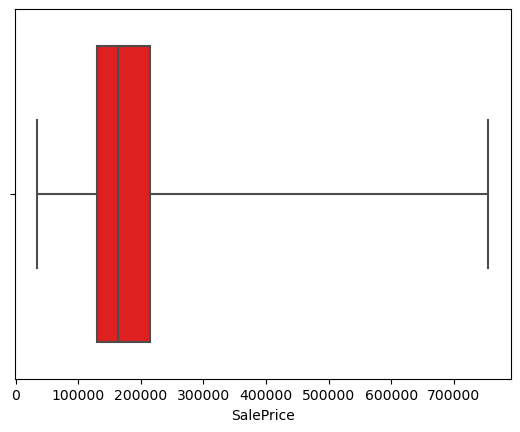

In [61]:
sns.boxplot(df['SalePrice'], whis=10, color="r")

Visualization part is completed.

The columns that are going to be drop are Utilities.They are strings,cannot be categorized and dont contribute much to the outcome.

In [62]:
df.drop(['Utilities'],axis=1,inplace=True)

<span class="burk">Preprocessing</span>

In [63]:
df.describe() #statistics summary for numerical columns

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000
mean    724.136130    56.767979     70.98847   10484.749144     6.104452     5.595890  1970.930651   1984.758562   102.310078   444.726027    46.647260   569.721747  1061.095034  1169.860445   348.826199      6.380137  1525.066781      0.425514      0.055651     1.562500     0.388699      2.884418      1.045377      6.542808     0.617295  1978.193841     1.776541   476.860445    96.206336    46.559932      23.015411     3.639555    15.051370     3.448630     47.315068     6.344178  2007.804795  181477.005993
std     416.159877    41.940650     24.82875    8957.442311     1.390153     1.124343    30.145255     20.785185   182.595606   462.664785   163.520016   449.375525   442.272249   391.161983   439.696370     50.892844   528.042957      0.521615      0.236699     0.551882     0.504929      0.817229      0.216292      1.598484     0.650575    24.890704     0.745554   214.466769   126.158988    66.381023      63.191089    29.088867    55.080816    44.896939    543.264432     2.686352     1.329738   79105.586863
min       1.000000    20.000000     21.00000    1300.000000     1.000000     1.000000  1875.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     360.500000    20.000000     60.00000    7621.500000     5.000000     5.000000  1954.000000   1966.000000     0.000000     0.000000     0.000000   216.000000   799.000000   892.000000     0.000000      0.000000  1143.250000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   338.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  130375.000000
50%     714.500000    50.000000     70.00000    9522.500000     6.000000     5.000000  1972.000000   1993.000000     0.000000   385.500000     0.000000   474.000000  1005.500000  1096.500000     0.000000      0.000000  1468.500000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    24.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163995.000000
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000     6.000000  2000.000000   2004.000000   160.000000   714.500000     0.000000   816.000000  1291.500000  1392.000000   729.000000      0.000000  1795.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   171.000000    70.000000       0.00000

In [64]:
#Check the null values in dataset
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [65]:
#filling the missing values for numerical terms by mean
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [66]:
#filling the missing values for categorical terms by mode
df['Alley']=df['Alley'].fillna(df['Alley'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['PoolQC']=df['PoolQC'].fillna(df['PoolQC'].mode()[0])
df['Fence']=df['Fence'].fillna(df['Fence'].mode()[0])
df['MiscFeature']=df['MiscFeature'].fillna(df['MiscFeature'].mode()[0])

In [67]:
#Filled the null values in dataset
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

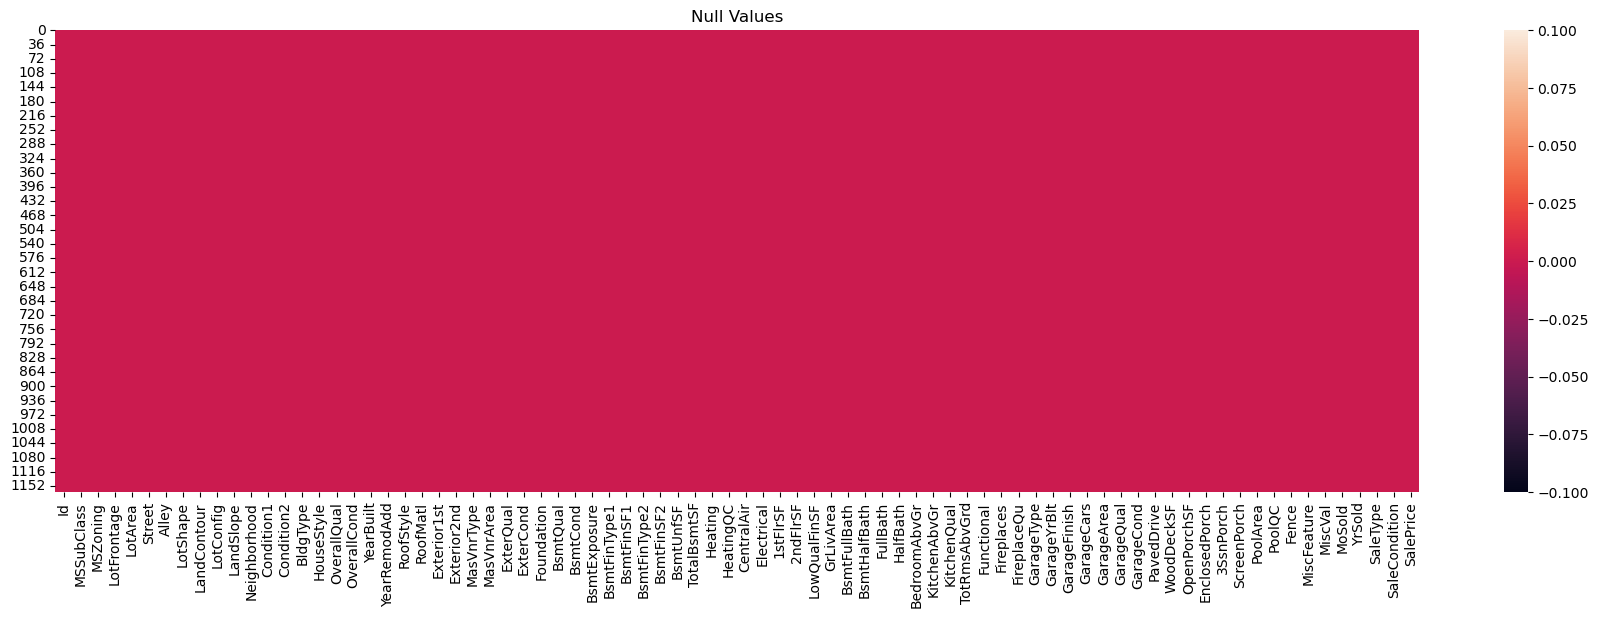

In [68]:
# Heatmap for Null value for data.
plt.figure(figsize=[22,6])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null value in the dataset.

Since the dataset has a lot string values.We will use the encoding techniques to convert the string data to numerical one.

<span class="burk">Encoding of DataFrame:</span>

In [69]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [70]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [71]:
df.head()    # informtion about top of the data after Ordinal encoder

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice
0  127         120       3.0     70.98847     4928     1.0    0.0       0.0          3.0        4.0        0.0          13.0         2.0         2.0       4.0         2.0            6            5       1976          1976        1.0       1.0          8.0          9.0         2.0         0.0        3.0        4.0         1.0       2.0       3.0           3.0           0.0         120           5.0           0        958         1078      1.0        4.0         1.0         4.0       958         0             0        958             0             0         2         0             2             1          3.0             5         6.0           1          4.0         1.0       1977.0           1.0           2         440         4.0         4.0         2.0           0          205              0          0            0         0     2.0    2.0          2.0        0       2    2007       8.0            4.0     128000
1  889          20       3.0     95.00000    15865     1.0    0.0       0.0          3.0        4.0        1.0          12.0         2.0         2.0       0.0         2.0            8            6       1970          1970        0.0       5.0         12.0         13.0         2.0         0.0        2.0        2.0         2.0       3.0       1.0           1.0           0.0         351           4.0         823       1043         2217      1.0        0.0         1.0         4.0      2217         0             0       2217             1             0         2         0             4             1          2.0             8         6.0           1          4.0         1.0       1970.0           2.0           2         621         4.0         4.0         2.0          81          207              0          0          224         0     2.0    2.0          2.0        0      10    2007       8.0            4.0     268000
2  793          60       3.0     92.00000     9920     1.0    0.0       0.0          3.0        1.0        0.0          15.0         2.0         2.0       0.0         5.0            7            5       1996          1997        1.0       1.0          7.0          7.0         2.0         0.0        2.0        4.0         2.0       2.0       3.0           0.0           2.0         862           5.0           0        255         1117      1.0        0.0         1.0         4.0      1127       886             0       2013             1             0         2         1             3             1          3.0             8         6.0           1          4.0         1.0       1997.0           2.0           2         455         4.0         4.0         2.0         180          130              0          0            0         0     2.0    2.0          2.0        0       6    2007       8.0            4.0     269790
3  110          20       3.0    105.00000    11751     1.0    0.0       0.0          3.0        4.0        0.0          14.0         2.0         2.0       0.0         2.0            6            6       1977          1977        3.0       1.0          8.0          9.0         1.0       480.0

<span class="burk">Describe the dataset:</span>

In [72]:
# Stastistical summary
df_describe=df.describe()
df_describe

Id   MSSubClass     MSZoning  LotFrontage        LotArea       Street        Alley     LotShape  LandContour    LotConfig    LandSlope  Neighborhood   Condition1   Condition2     BldgType   HouseStyle  OverallQual  OverallCond    YearBuilt  YearRemodAdd    RoofStyle     RoofMatl  Exterior1st  Exterior2nd   MasVnrType   MasVnrArea    ExterQual    ExterCond   Foundation     BsmtQual     BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF      Heating    HeatingQC   CentralAir   Electrical     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Functional   Fireplaces  FireplaceQu   GarageType  GarageYrBlt  GarageFinish   GarageCars   GarageArea   GarageQual   GarageCond   PavedDrive   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       PoolQC        Fence  MiscFeature       MiscVal  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    724.136130    56.767979     3.013699    70.988470   10484.749144     0.996575     0.030822     1.938356     2.773973     3.004281     0.064212     12.145548     2.032534     2.005993     0.476027     3.043664     6.104452     5.595890  1970.930651   1984.758562     1.402397     1.086473     8.659247     9.363014     1.758562   102.310078     2.530822     3.725171     1.395548     2.282534     2.802226      2.273116      2.798801   444.726027      4.713185    46.647260   569.721747  1061.095034     1.035959     1.569349     0.933219     3.688356  1169.860445   348.826199      6.380137  1525.066781      0.425514      0.055651     1.562500     0.388699      2.884418      1.045377     2.328767      6.542808     5.742295     0.617295     2.389555     2.225171  1978.193841      1.233733     1.776541   476.860445     3.872432     3.905822     1.853596    96.206336    46.559932      23.015411     3.639555    15.051370     3.448630     1.994863     1.880993     1.996575     47.315068   
std     416.159877    41.940650     0.633120    22.437056    8957.442311     0.058445     0.172909     1.412262     0.710027     1.642667     0.284088      6.010364     0.871703     0.250035     1.180870     1.898625     1.390153     1.124343    30.145255     20.785185     0.832539     0.642848     3.097443     3.462380     0.611174   182.047152     0.699425     0.744463     0.709379     0.857830     0.674746      1.144218      1.837839   462.664785      0.925186   163.520016   449.375525   442.272249     0.302078     1.749129     0.249749     1.042606   391.161983   439.696370     50.892844   528.042957      0.521615      0.236699     0.551882     0.504929      0.817229      0.216292     0.832992      1.598484     0.987250     0.650575     0.905923     1.767017    24.198559      0.809747     0.745554   214.466769     0.592724     0.503323     0.501894   126.158988    66.381023      63.191089    29.088867    55.080816    44.896939     0.092426     0.457685     0.092505    543.264432   
min       1.

there are 80 columns is shown here

<span class="burk">Checking Correlation</span>

In [73]:
corr_mat=df.corr()
corr_mat

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  SaleCondition  SalePrice
Id             1.000000    0.004259  0.009307    -0.005969 -0.029212  0.003613 -0.009049  0.022978    -0.020245   0.053927   0.007152     -0.014989    0.000425    0.031623  0.026302    0.014518    -0.036965     0.039761  -0.016942     -0.018590   0.037059 -0.023900    -0.045575    -0.045721    0.064161   -0.060503  -0.006231   0.039946   -0.006339  0.045212  0.019818     -0.033328      0.012860    0.003868      0.037426    0.005269  -0.019494    -0.013812  0.041861   0.005955    0.003921    0.037801  0.009647 -0.029671     -0.070180  -0.024325      0.023027     -0.043572 -0.015187 -0.028512      0.009376      0.001216    -0.000240     -0.001613    0.019812   -0.024175     0.000080    0.009583    -0.000456      0.005835    0.007549    0.010048   -0.007857   -0.005130   -0.009755   -0.027498    -0.013642       0.004885  -0.021773     0.005169  0.065832 -0.013705 -0.003887     0.005644  0.001304  0.023479 -0.008853  0.024384      -0.014726  -0.023897
MSSubClass     0.004259    1.000000  0.007478    -0.336681 -0.124151 -0.035981  0.216396  0.104485    -0.021387   0.076880  -0.014930      0.013918   -0.042474   -0.044319  0.731815    0.381585     0.070462    -0.056978   0.023988      0.056618  -0.100641 -0.032214    -0.090178    -0.120022   -0.013252    0.027813  -0.024133   0.004186    0.053951 -0.052242 -0.013220     -0.068192      0.017515   -0.052236      0.040573   -0.062403  -0.134170    -0.214042  0.047734  -0.001994   -0.113883    0.045533 -0.227927  0.300366      0.053737   0.086448      0.004556      0.008207  0.140807  0.168423     -0.013283      0.283506    -0.011378      0.051179    0.022913   -0.035792     0.024708    0.077469     0.073130     -0.000067   -0.027639   -0.092408   -0.010568   -0.025595   -0.068702   -0.022609     0.017468      -0.004252  -0.043210    -0.013291  0.009583 -0.002076  0.043111     0.005979 -0.023503 -0.016015 -0.038595  0.035050      -0.028981  -0.060775
MSZoning       0.009307    0.007478  1.000000    -0.069661 -0.023328  0.140215 -0.371755  0.053655     0.001175  -0.027246  -0.023952     -0.251833   -0.025651    0.031959 -0.024776   -0.110991    -0.134037     0.189553  -0.299732     -0.174586   0.000913  0.009719    -0.012037     0.005548   -0.033521   -0.063862   0.184815  -0.099269   -0.244844  0.123822  0.002336      0.037414      0.021518   -0.034161     -0.031322    0.027055  -0.032638    -0.058896  0.051188   0.119852   -0.015887   -0.079205 -0.033095 -0.048968      0.012098  -0.064125     -0.007287      0.006345 -0.188837 -0.121209     -0.001906      0.026744     0.111689     -0.031062   -0.091684    0.010658     0.005628    0.125155    -0.261072      0.162566   -0.126031   -0.168364   -0.168881   -0.087375   -0.077280   -0.004509    -0.152694       0.111221   0.004409     0.030793 -0.001663  0.001204 -0.035770     0.000802  0.003416 -0.051646 -0.004964  0.079854       0.004501  -0.133221
LotFrontage   -0.005969   -0.336681 -0.069661     1.000000  0.299452 -0.035309 -0.187657 -0.144523    -0.073451  -0.192468   0.046051      0.065824   -0.025581    0.011761 -

<AxesSubplot:title={'center':'Corrleation Matrix'}>

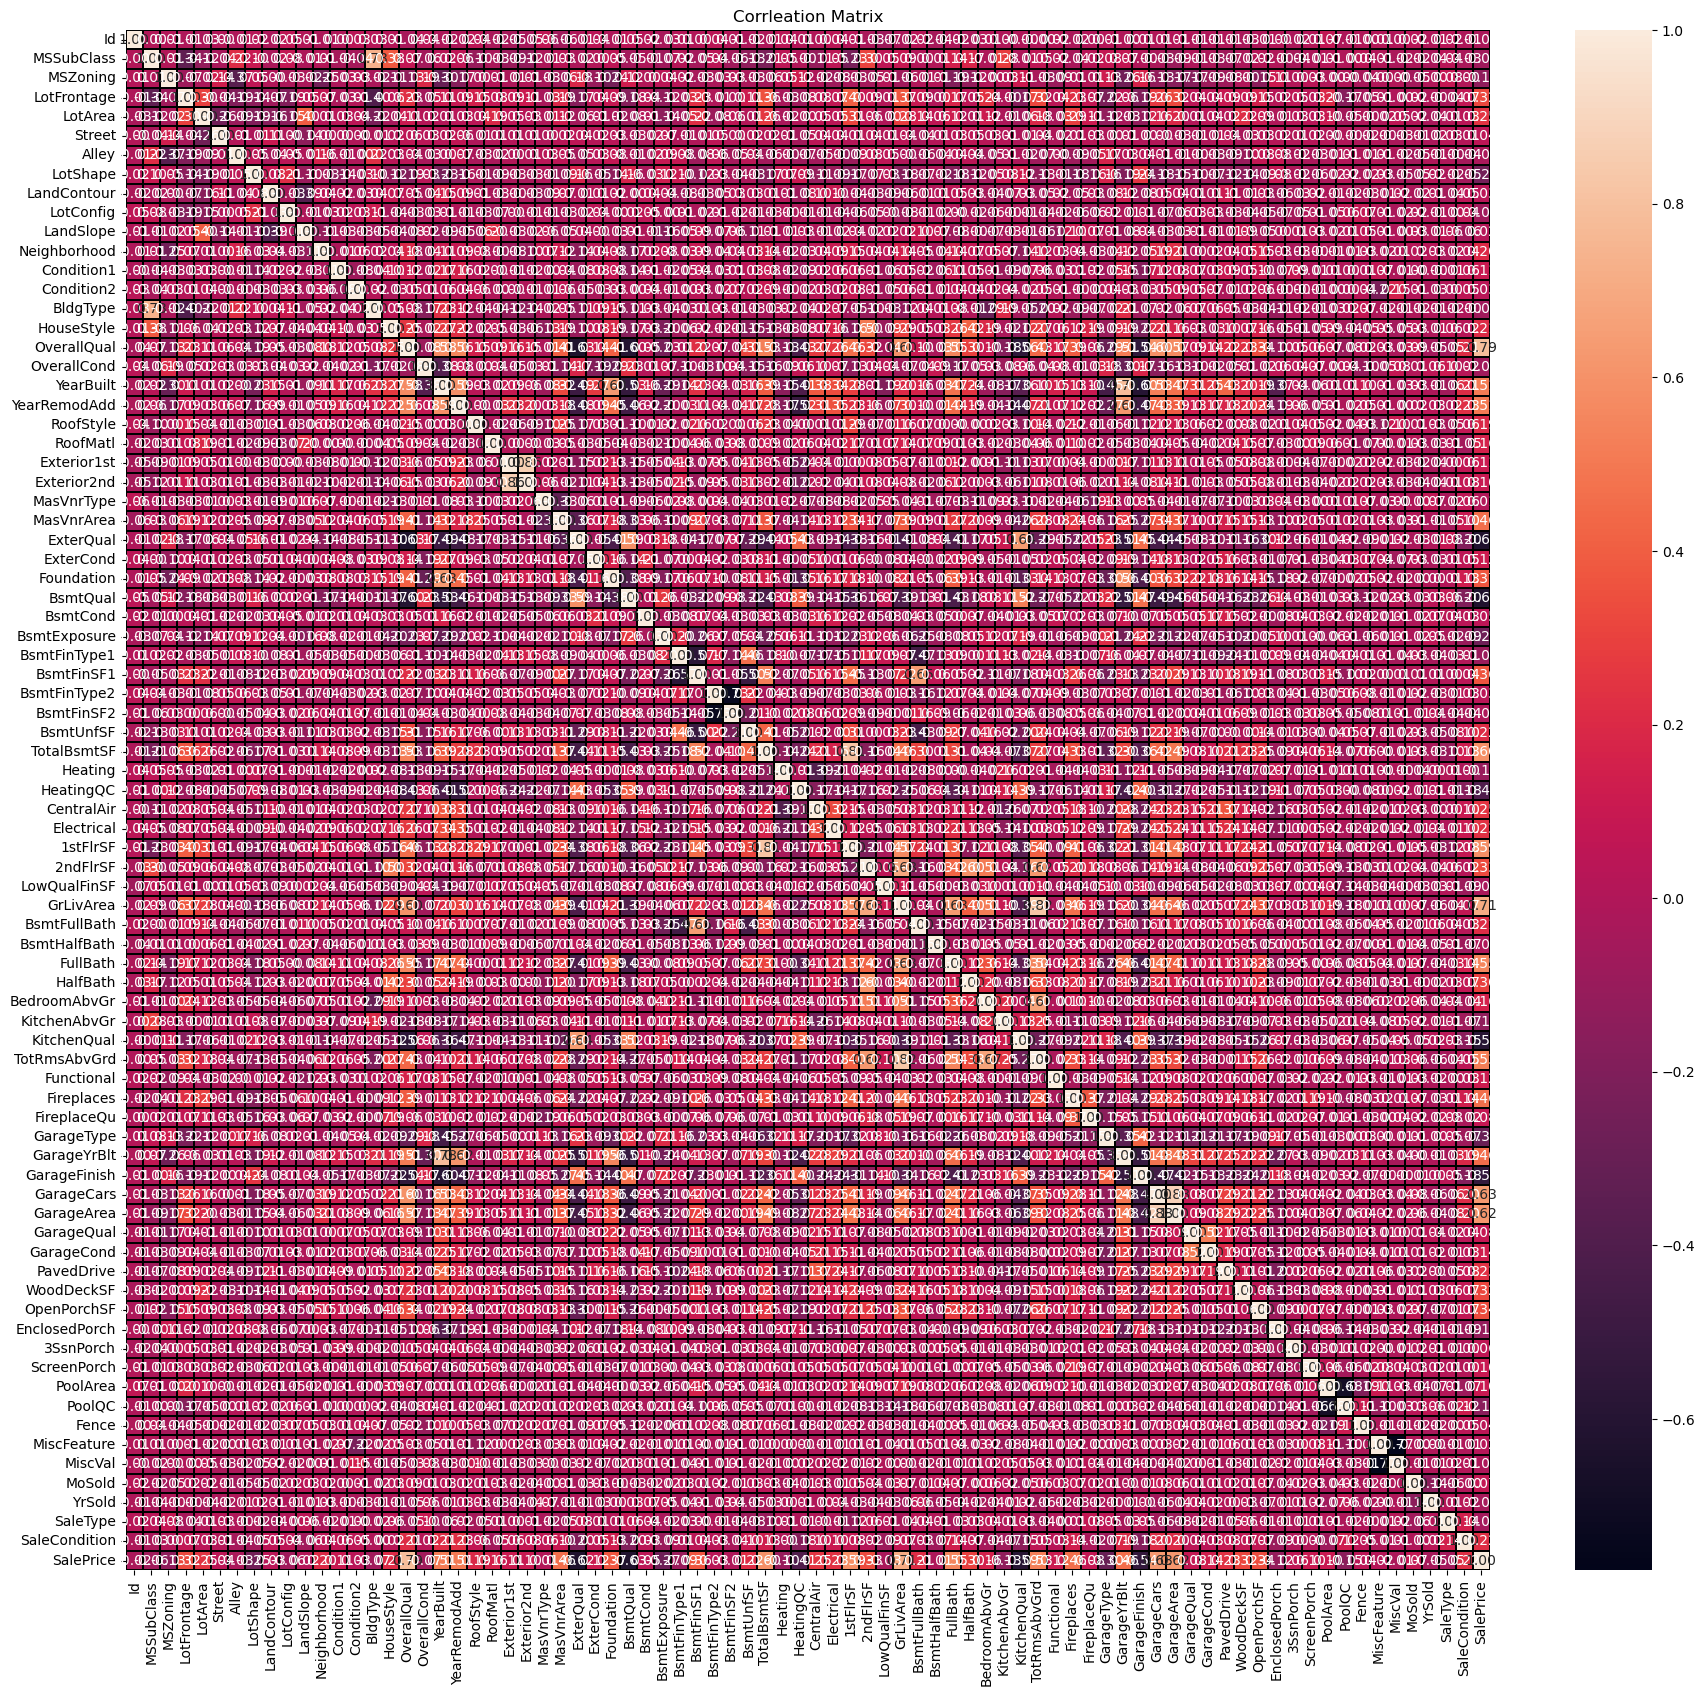

In [74]:
# Heatmap Display distribution of data across all level of category

plt.figure(figsize=(22,20))
plt.title("Corrleation Matrix")
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observations: We are unable to identify the correlation in above heatmap due to huge number of columns.

In [75]:
corr_matrix=df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea    

Now we can clearly identify the correlation of independent variables with the target variables "SalePrice".There are around 25 variables who has less than 0.01 correlation value(very week relationship.)

Checking the columns which are postively and negative correlated with the target columns:

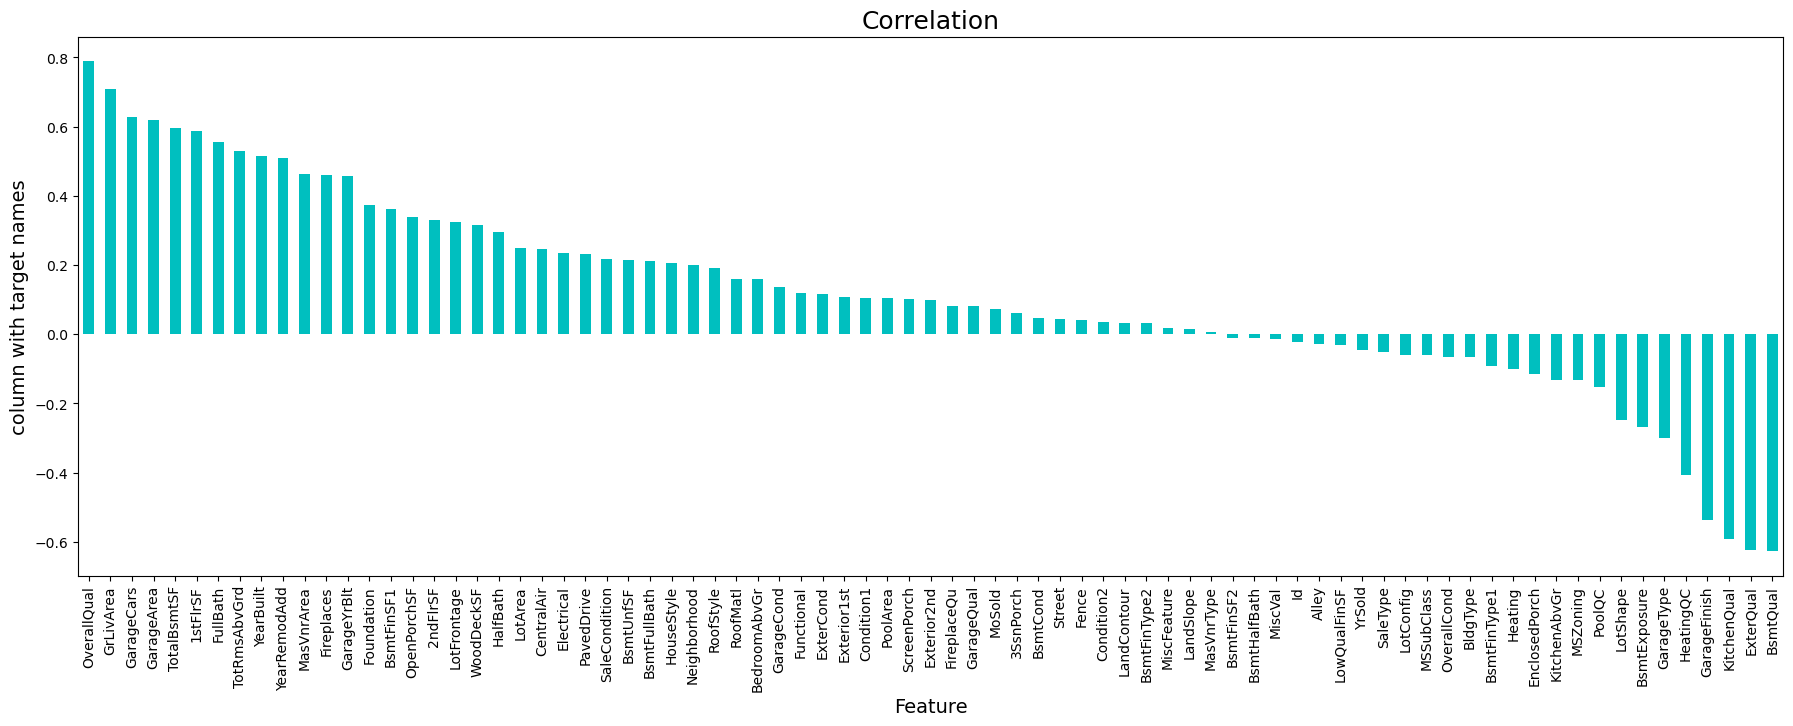

In [76]:
plt.figure(figsize=(22,7))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Lets check the data distribution among all the columns.

In [77]:
collist=df.columns.values
ncol=12
nrow=10

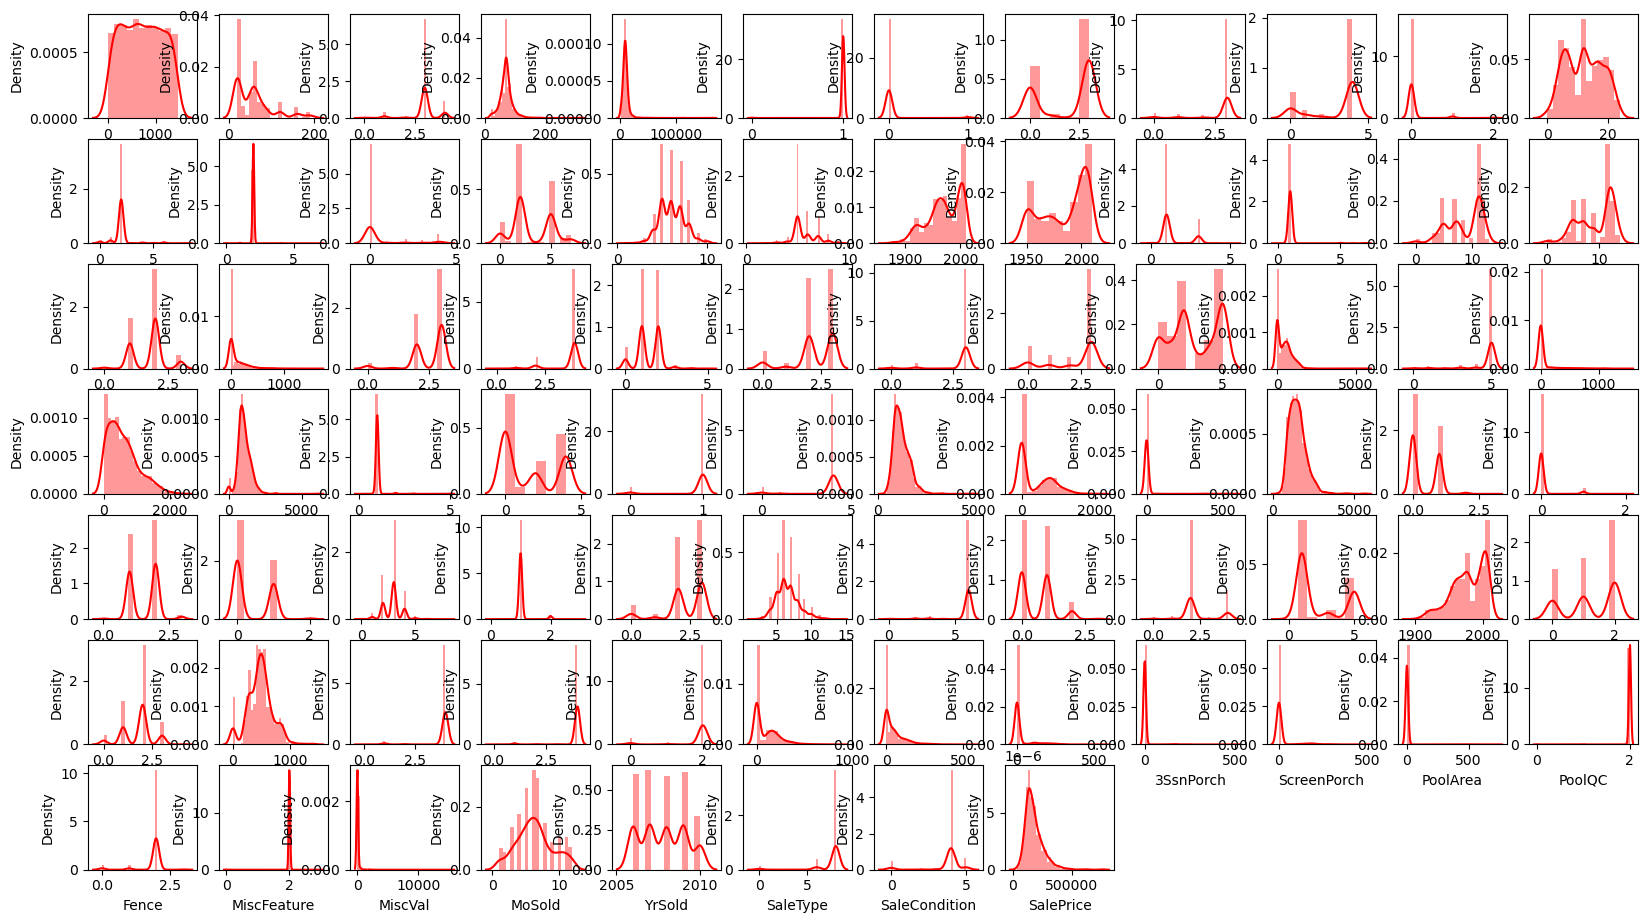

In [78]:

#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,16))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]],color='r')</div><i class="fa fa-lightbulb-o "></i>

We can see skewness in data for the multiple columns, will handle the skewness in further steps.

Outliers Check:

There are 80 columns in dataset so its not possible to plot each and every columns separately or plot all together. so we will print in 4 steps

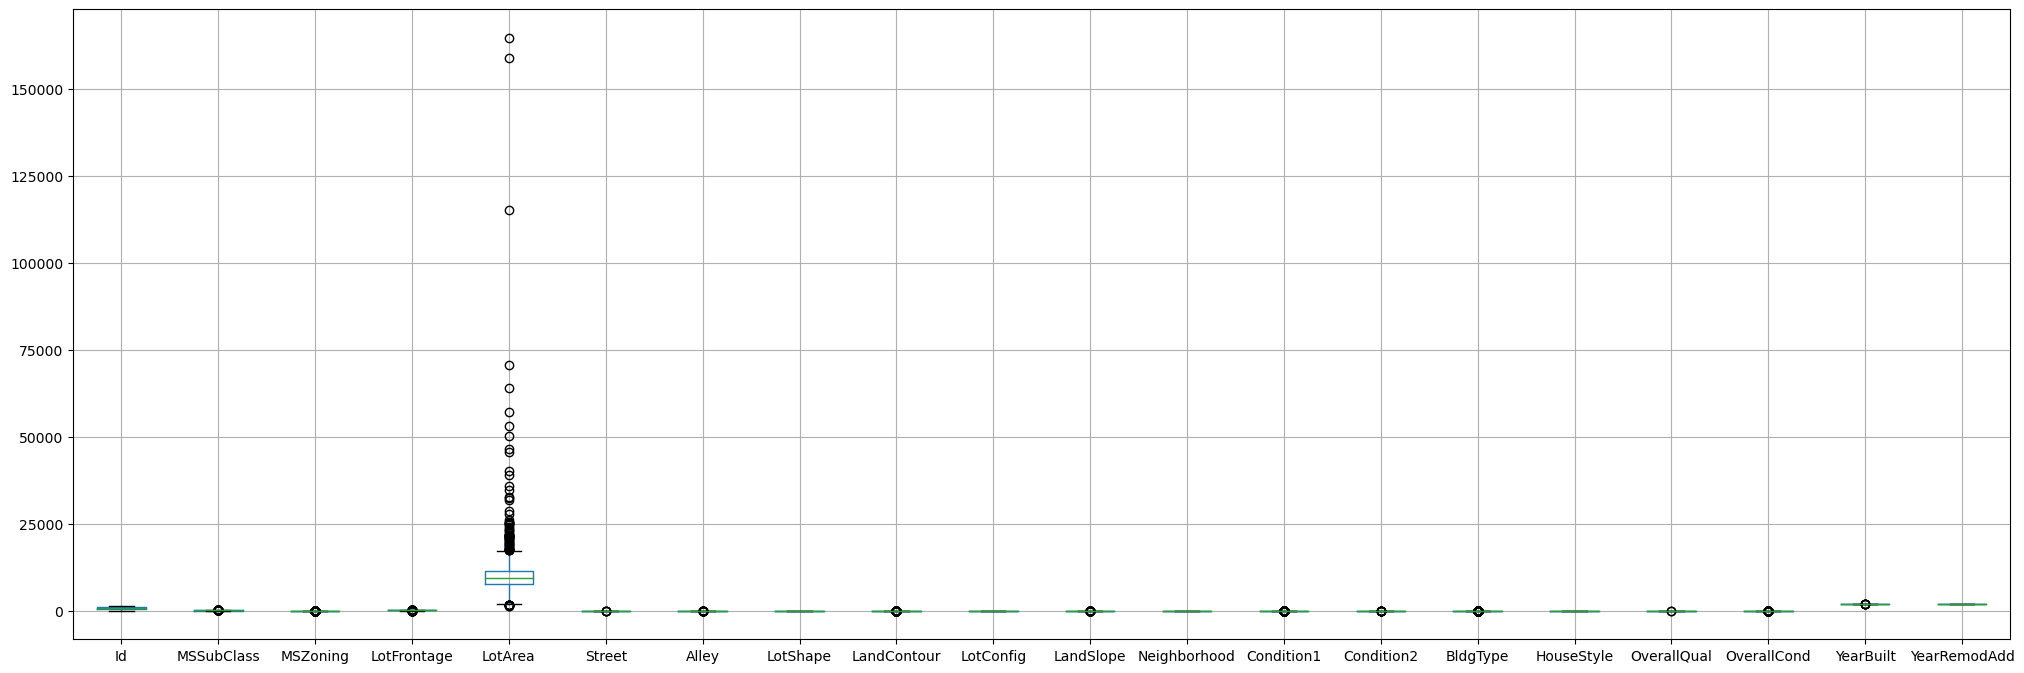

In [79]:
#Plotting Boxplots for first 20 columns
df.iloc[:,0:20].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are outliers in lot area column.

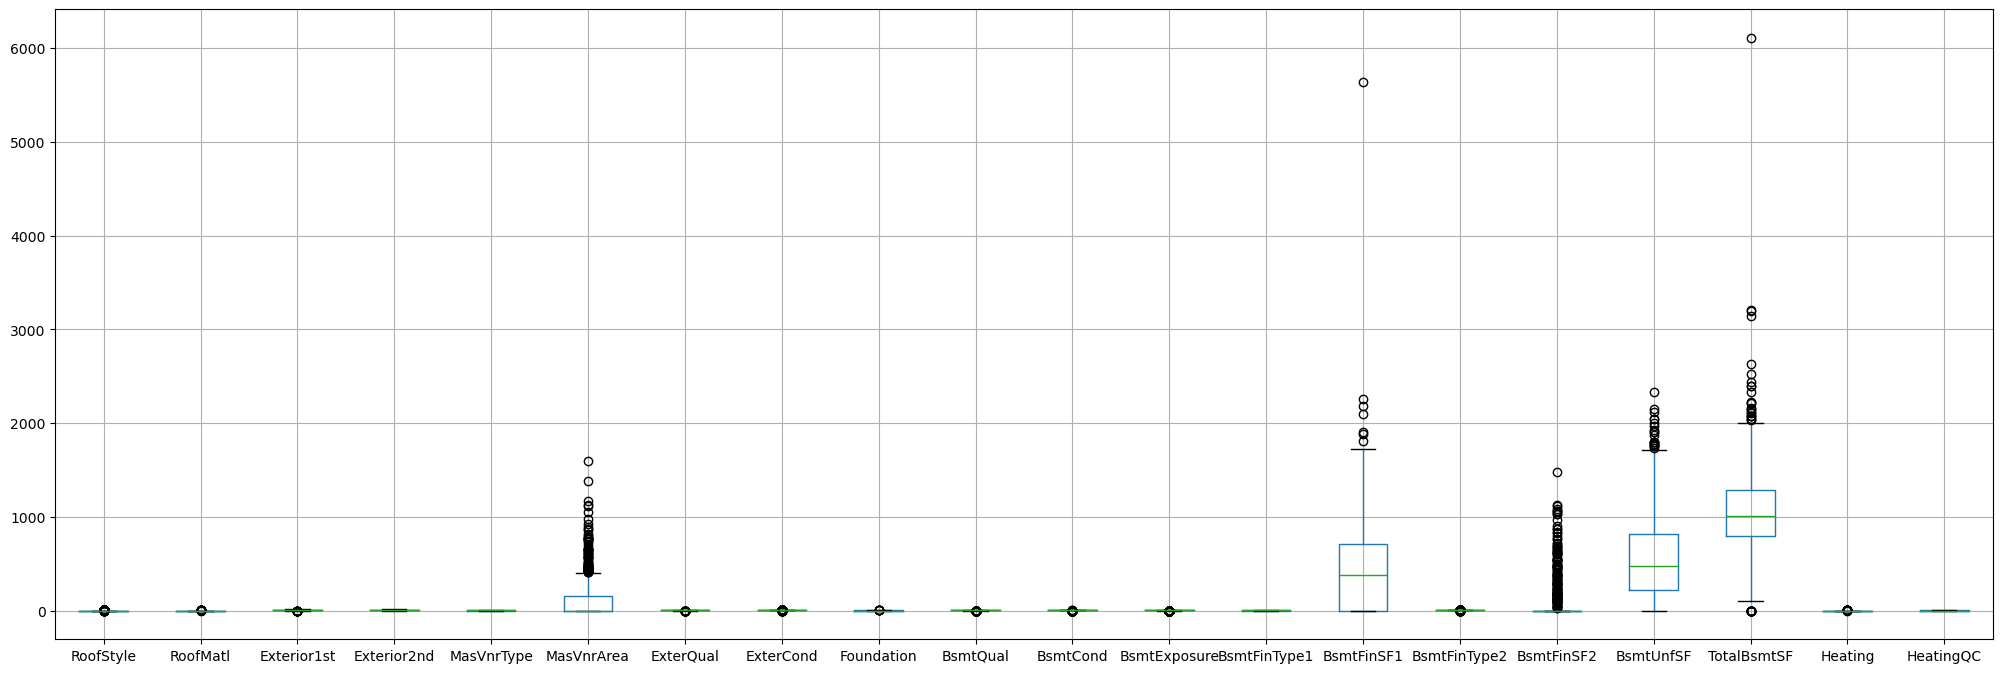

In [80]:
#Plotting boxplot for next 20 columns
df.iloc[:,20:40].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

We can see outliers in MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF.

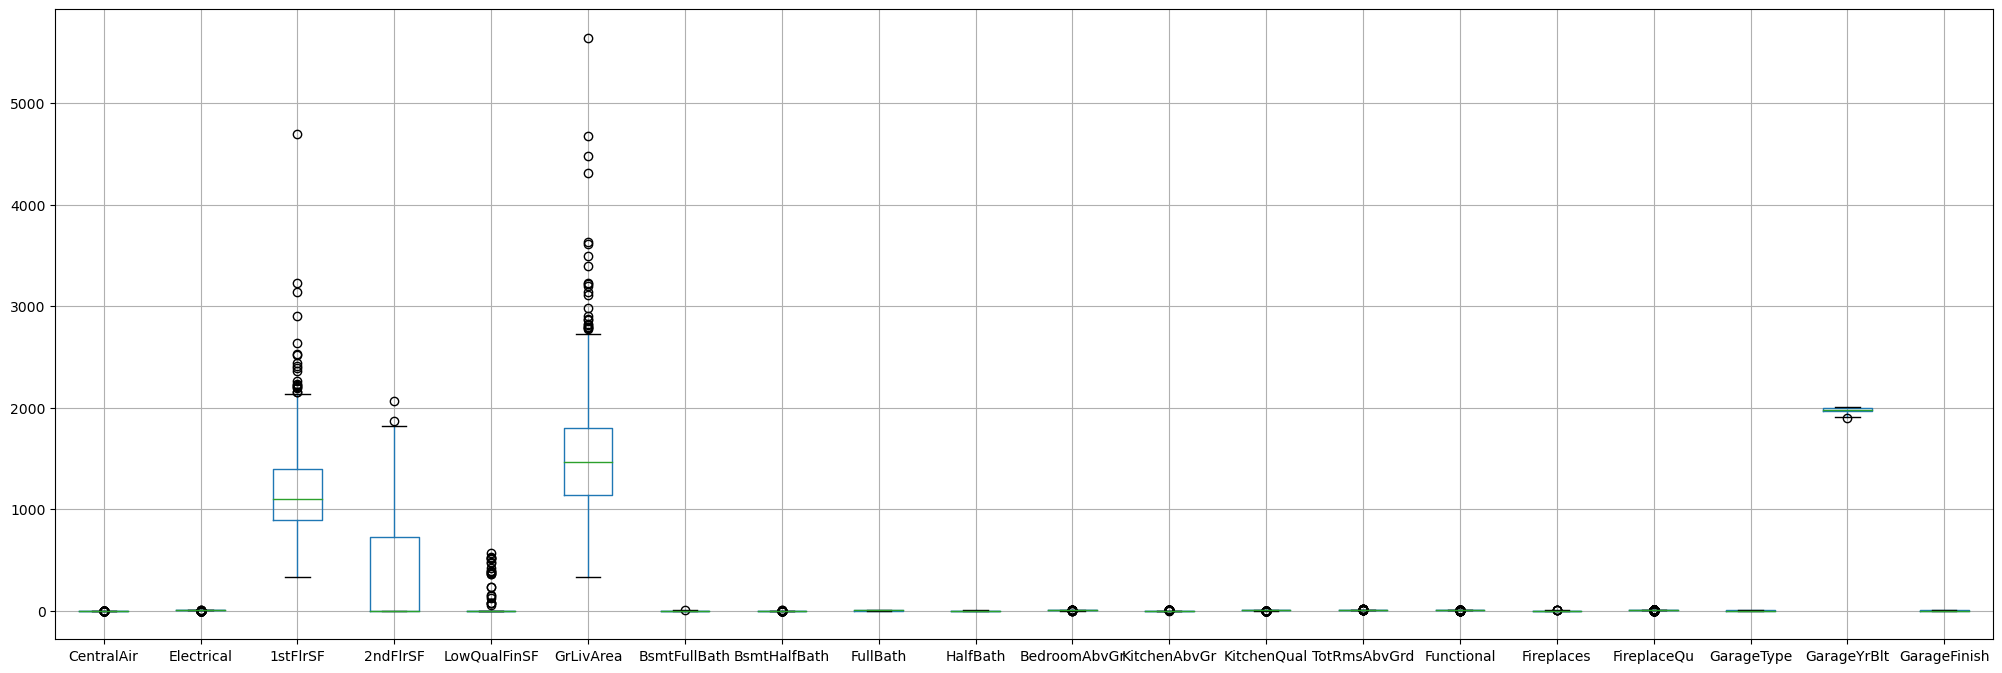

In [81]:
#Plotting boxplot for next 20 columns
df.iloc[:,40:60].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

We can see outliers in 1stFlrSF, LowQualFinSF,GrLivArea,GarageYrBuilt.

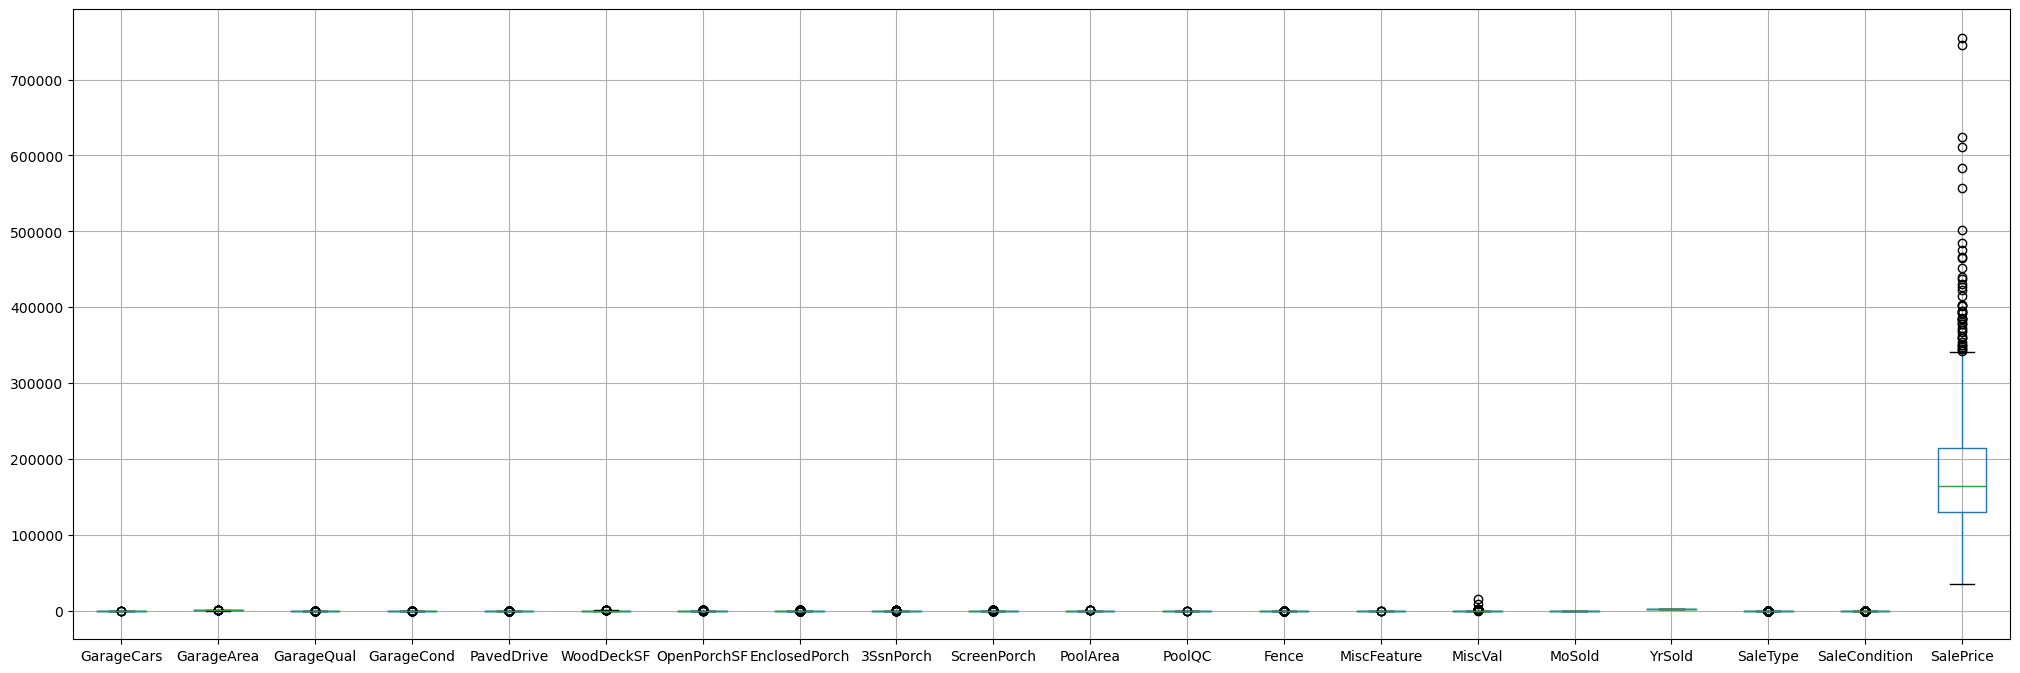

In [82]:
#Plotting boxplot for rest all the columns
df.iloc[:,60:80].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

We can see one or two values outer of whiskers but those are near to whiskers so these are not outliers.The outliers are not consider for target variables.

In [83]:
#Checking skewness
df.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
Alley             5.436187
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
T

We can see skewness in the dataset,We will handle the skewness using power transform function.

In [84]:
# Splitting the indepedent and target variable in x and y
x= df.drop('SalePrice',axis=1)
y= df['SalePrice']

In [85]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [86]:
df_new.skew()

Id               -0.268486
MSSubClass        0.064007
MSZoning          0.233113
LotFrontage       0.161368
LotArea           0.032509
Street          -17.021969
Alley             5.436187
LotShape         -0.594207
LandContour      -2.592303
LotConfig        -1.030401
LandSlope         3.954345
Neighborhood     -0.146541
Condition1        0.225468
Condition2        0.537277
BldgType          1.857194
HouseStyle       -0.080331
OverallQual       0.021658
OverallCond       0.048063
YearBuilt        -0.126641
YearRemodAdd     -0.225131
RoofStyle        -0.292233
RoofMatl         -6.314987
Exterior1st      -0.338023
Exterior2nd      -0.352793
MasVnrType       -0.016203
MasVnrArea        0.416370
ExterQual        -0.605112
ExterCond        -2.270791
Foundation        0.004296
BsmtQual         -0.413999
BsmtCond         -3.025865
BsmtExposure     -0.914214
BsmtFinType1     -0.206639
BsmtFinSF1       -0.404528
BsmtFinType2     -2.420885
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
T

Skewness has been removed, now we can proceed with further steps.

In [87]:
x=df_new
x.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  SaleCondition
0 -1.544968    1.370435 -0.162456     0.093658 -1.213954  0.058621 -0.178331 -1.366794     0.341434   0.617281  -0.238775      0.198357    0.053284      0.0038  2.310950   -0.463401    -0.052799    -0.496528   0.026859     -0.613054  -0.388056 -0.088315    -0.326182    -0.209982    0.383932   -0.822734   0.778521   0.377961   -0.558722 -0.606202  0.300945      0.673258     -1.619575   -0.112649      0.360988   -0.363019   0.903777     0.099335 -0.092972   1.231264    0.267506    0.302595 -0.458345 -0.871745      -0.14173  -1.236502     -0.837006     -0.238775   0.80229 -0.782707     -1.083459     -0.169259     0.944965     -0.984125    0.276573    0.777879     1.673239   -0.673804    -0.219139     -0.376496    0.259753   -0.113082    0.220168    0.195505    0.300947   -0.959773     1.409990      -0.411301  -0.138554    -0.297551 -0.077648  0.058621  0.177447     0.010754 -0.193133 -1.719437 -0.604806  0.409069       0.029735
1  0.461941   -1.167999 -0.162456     1.117135  1.100521  0.058621 -0.178331 -1.366794     0.341434   0.617281   4.188040      0.037086    0.053284      0.0038 -0.436548   -0.463401     1.345826     0.407009  -0.185817     -0.854247  -5.058580  5.396201     1.159356     1.119374    0.383932   -0.822734  -1.124906  -2.646123    0.852373  0.982931 -3.324610     -1.419429     -1.619575    0.394677     -2.532187    2.756067   1.027313     2.374300 -0.092972  -0.968376    0.267506    0.302595  2.122554 -0.871745      -0.14173   1.295050      1.176812     -0.238775   0.80229 -0.782707      1.356214     -0.169259    -0.687929      0.943901    0.276573    0.777879     1.673239   -0.673804    -0.505658      0.972281    0.259753    0.678810    0.220168    0.195505    0.300947    0.781991     1.414498      -0.411301  -0.138554     3.360787 -0.077648  0.058621  0.177447     0.010754 -0.193133  1.320612 -0.604806  0.409069       0.029735
2  0.254221    0.490047 -0.162456     0.998803  0.158048  0.058621 -0.178331 -1.366794     0.341434  -1.482445  -0.238775      0.512775    0.053284      0.0038 -0.436548    1.021519     0.656375    -0.496528   0.836680      0.495717  -0.388056 -0.088315    -0.646692    -0.781046    0.383932   -0.822734  -1.124906   0.377961    0.852373 -0.606202  0.300945     -1.754271     -0.368766    0.925416      0.360988   -0.363019  -0.504500     0.185571 -0.092972  -0.968376    0.267506    0.302595  0.058641  1.176207      -0.14173   1.003880      1.176812     -0.238775   0.80229  1.268421      0.151784     -0.169259     0.944965      0.943901    0.276573    0.777879     1.673239   -0.673804     0.769650      0.972281    0.259753   -0.045422    0.220168    0.195505    0.300947    1.043999     1.198911      -0.411301  -0.138554    -0.297551 -0.077648  0.058621  0.177447     0.010754 -0.193133 -0.076750 -0.604806  0.409069       0.029735
3 -1.610857   -1.167999 -0.162456     1.495566  0.496002  0.058621 -0.178331 -1.366794     0.341434   0.617281  -0.238775      0.356843    0.053284      0.0038 -0.436548   -0.463401    -0.052799     0.407009   0.063582     -0.569998   1.737139 -0.088315

<span class="burk">Importing Libraries for Metrics and Model buiding.</span>

In [88]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [89]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

<span class="burk">Regression Method</span>

Linear Regression Model

In [90]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [91]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.8611922773551914
At random state 0,the testing accuracy is:0.6281062711267049


At random state 1,the training accuracy is:0.8428399595414505
At random state 1,the testing accuracy is:0.8000667528031479


At random state 2,the training accuracy is:0.8599277942549721
At random state 2,the testing accuracy is:0.7392257984686482


At random state 3,the training accuracy is:0.8345878327022818
At random state 3,the testing accuracy is:0.8138999232686428


At random state 4,the training accuracy is:0.8402033609825826
At random state 4,the testing accuracy is:0.7653085502421474


At random state 5,the training accuracy is:0.8797863831626551
At random state 5,the testing accuracy is:0.6346109102328922


At random state 6,the training accuracy is:0.8383652092013691
At random state 6,the testing accuracy is:0.8063720500201562


At random state 7,the training accuracy is:0.847729784642191
At random state 7,the testing accuracy is:0.7626951984179203


A

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=99)
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
print(lr.intercept_)

181331.01205379708


In [94]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff_df

Co-efficient
Id               263.780534
MSSubClass     -3528.086564
MSZoning        -417.632112
LotFrontage     -242.161025
LotArea         4207.689528
Street          1046.669128
Alley           -349.522302
LotShape         955.881927
LandContour     2332.877267
LotConfig       -955.699800
LandSlope       -377.424889
Neighborhood    1345.163420
Condition1       927.188046
Condition2     -1179.034353
BldgType       -2591.725049
HouseStyle      -365.793129
OverallQual    16113.485220
OverallCond     6328.131541
YearBuilt      -4984.167733
YearRemodAdd     927.260045
RoofStyle       4418.111758
RoofMatl       11821.738240
Exterior1st    -2769.899365
Exterior2nd    -1109.019464
MasVnrType       212.768668
MasVnrArea      -712.423537
ExterQual      -6211.107670
ExterCond       1087.659485
Foundation      2777.670464
BsmtQual       -6032.837405
BsmtCond         145.916415
BsmtExposure   -5253.852660
BsmtFinType1     -94.781727
BsmtFinSF1      3503.769308
BsmtFinType2    7880.435513
BsmtFinSF2      3975.756760
BsmtUnfSF      -7069.620666
TotalBsmtSF    11856.967103
Heating        -1519.049891
HeatingQC      -3180.272590
CentralAir      -413.255257
Electrical     -3254.361245
1stFlrSF        6612.823847
2ndFlrSF        4631.525397
LowQualFinSF   -1933.614060
GrLivArea      10813.490018
BsmtFullBath    1400.249452
BsmtHalfBath   -1825.039948
FullBath        6772.950451
HalfBath        5922.140411
BedroomAbvGr   -2815.344272
KitchenAbvGr    -778.009476
KitchenQual    -4619.523829
TotRmsAbvGrd    5657.113426
Functional      3886.453417
Fireplaces      6070.217998
FireplaceQu    -4561.363580
GarageType      1842.326214
GarageYrBlt     2534.867063
GarageFinish    -405.976023
GarageCars      9791.541826
GarageArea     -2358.726807
GarageQual      -214.621423
GarageCond      1103.399519
PavedDrive       850.843862
WoodDeckSF      2378.440230
OpenPorchSF     -701.197355
EnclosedPorch  -1934.411089
3SsnPorch        285.924680
ScreenPorch     1363.952941
PoolArea       -3284.264312
PoolQC        -10885.095306
Fence            834.071200
MiscFeature    -4332.749258
MiscVal         -313.287204
MoSold         -2293.103704
YrSold          -573.868409
SaleType       -2042.321258
SaleCondition   2572.347035

In [95]:
pred=lr.predict(x_test)

In [96]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

Actual      Predicted
1166   40000   57240.896385
610   285000  292995.009450
304   190000  184681.765573
266   175500  177710.196520
434   159950  120132.127974

In [97]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 23292.08090260509
Mean squared error: 1092376863.4258146
Root mean squared error: 33051.124994859325


In [98]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

82.14120374676183


In [99]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

83.17074217579034


The Cross validation Score for Linear Regression Model

In [100]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for tesing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6839197221997196 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.6795346280076217 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.7367114100476273 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.7513770475470654 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.7201744196681684 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.7336667265829203 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.75780

Since the number dont have such impact on the accuracy and cv_score.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

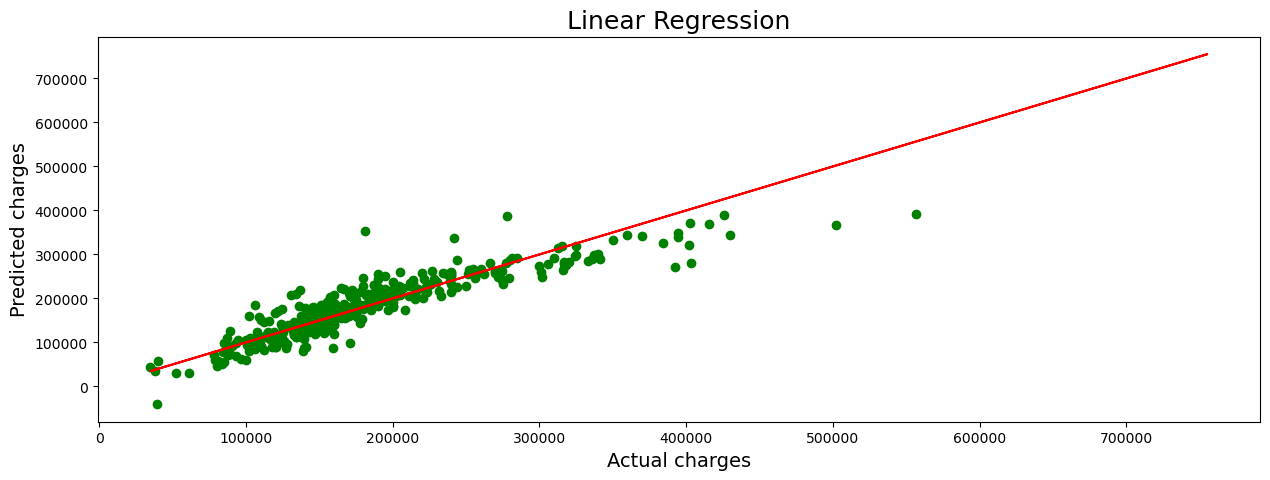

In [101]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

<span class="burk">Random Forest Regressor Model</span>

In [102]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()

In [103]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    rdr.fit(x_train,y_train)
    pred_train=rdr.predict(x_train)
    pred_test=rdr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9816116526047434
At random state 0,the testing accuracy is:0.7130725130760375


At random state 1,the training accuracy is:0.9782227165578653
At random state 1,the testing accuracy is:0.8635434409996391


At random state 2,the training accuracy is:0.975456405310457
At random state 2,the testing accuracy is:0.8375592759712587


At random state 3,the training accuracy is:0.9818083177860278
At random state 3,the testing accuracy is:0.8608182661783864


At random state 4,the training accuracy is:0.9738720036539532
At random state 4,the testing accuracy is:0.8290527221061944


At random state 5,the training accuracy is:0.9816597410303997
At random state 5,the testing accuracy is:0.6751621552837136


At random state 6,the training accuracy is:0.9734457991588404
At random state 6,the testing accuracy is:0.8924988660168848


At random state 7,the training accuracy is:0.9742338231471279
At random state 7,the testing accuracy is:0.8645461276902104


A

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=99)
rdr.fit(x_train,y_train)

RandomForestRegressor()

In [105]:
pred=rdr.predict(x_test)

In [106]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

Actual  Predicted
1166   40000  104847.86
610   285000  305671.49
304   190000  213992.14
266   175500  181435.72
434   159950  152222.60

In [107]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 17852.32905982906
Mean squared error: 681594476.3169756
Root mean squared error: 26107.364407710244


In [108]:
predict_test=rdr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

88.85690709184075


In [109]:
predict_train=rdr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

97.2465395799577


The Cross validation score for Random Forest Regressor Model

In [110]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.8109580521386882 and accuracy score for training is 0.9724653957995769 and accuracy score  for testing is 0.8885690709184075


At cross fold(j) the cv score is 0.853291769426241 and accuracy score for training is 0.9724653957995769 and accuracy score  for testing is 0.8885690709184075


At cross fold(j) the cv score is 0.8350575108545581 and accuracy score for training is 0.9724653957995769 and accuracy score  for testing is 0.8885690709184075


At cross fold(j) the cv score is 0.841896713621329 and accuracy score for training is 0.9724653957995769 and accuracy score  for testing is 0.8885690709184075


At cross fold(j) the cv score is 0.8517221690618362 and accuracy score for training is 0.9724653957995769 and accuracy score  for testing is 0.8885690709184075


At cross fold(j) the cv score is 0.8397637703058675 and accuracy score for training is 0.9724653957995769 and accuracy score  for testing is 0.8885690709184075


At cross fold(j) the cv score 

Since the number don't have such impact on the accuracy and cv_score.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

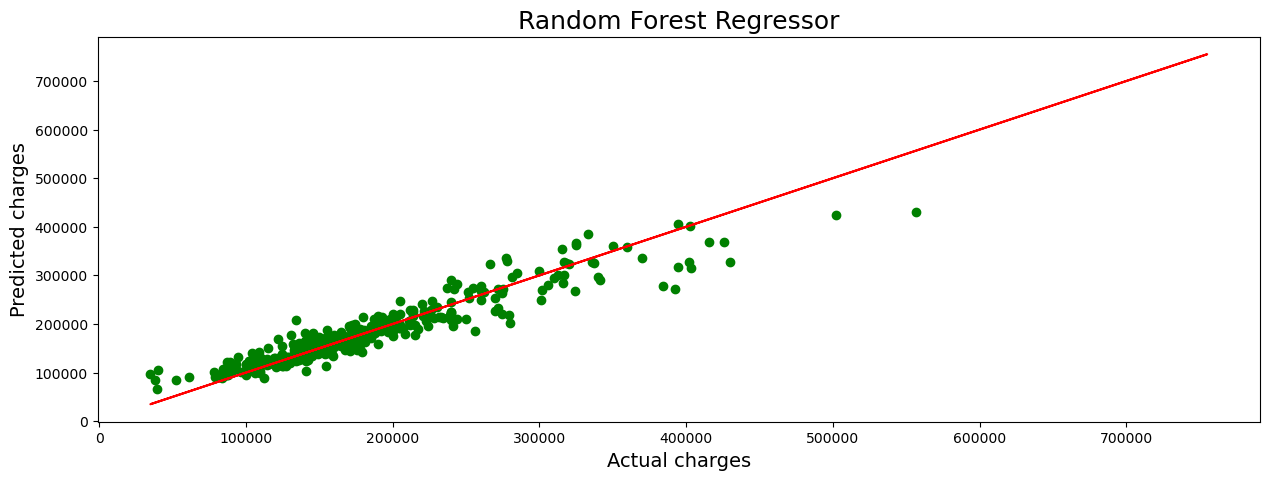

In [111]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

<span class="burk">Decision Tree Regressor Model</span>

In [112]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [113]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.44707226612871953


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.7701489867779969


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.6663773220204443


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.7608400036394927


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.5360975012560975


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.573426444579825


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.7836060326152828


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.7781821656956653


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.7326997595932874


At random 

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [115]:
pred=dtr.predict(x_test)

In [116]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

Actual  Predicted
601  289000   307000.0
137  106500   119750.0
33   128500   134800.0
315  155000   127000.0
199  237500   272000.0

In [117]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 26221.71794871795
Mean squared error: 1324765857.877493
Root mean squared error: 36397.333114906825


In [118]:
predict_test=dtr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

76.57293207491172


In [119]:
predict_train=dtr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

100.0


The Cross validation score for Decision Tree Regressor model

In [120]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6632529600466526 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7657293207491173


At cross fold(j) the cv score is 0.6975009733716279 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7657293207491173


At cross fold(j) the cv score is 0.6781516589864165 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7657293207491173


At cross fold(j) the cv score is 0.6825270098260955 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7657293207491173


At cross fold(j) the cv score is 0.71288382321003 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7657293207491173


At cross fold(j) the cv score is 0.6566753440224631 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7657293207491173


At cross fold(j) the cv score is 0.715048172800141 and accuracy score for training is 1.0 and accuracy score  for testin

Since the number dont have such impact on the accuracy and cv_score.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

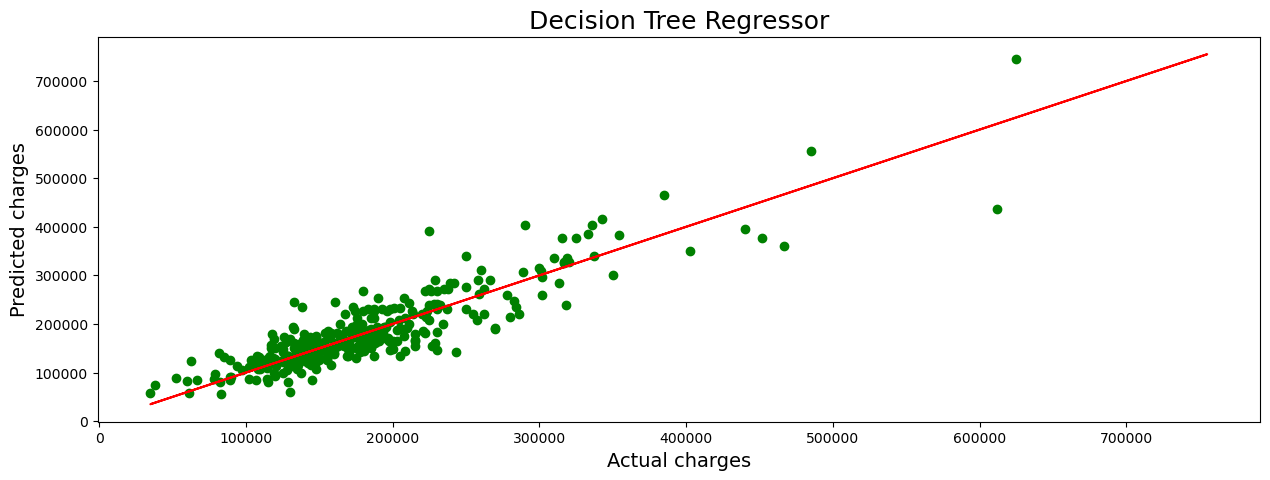

In [121]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

<span class="burk">XGBoost Regressor</span>

In [122]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [123]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9999708192693281
At random state 0,the testing accuracy is:0.6903268904314472


At random state 1,the training accuracy is:0.9999805300614729
At random state 1,the testing accuracy is:0.8369764399296244


At random state 2,the training accuracy is:0.9999351963104378
At random state 2,the testing accuracy is:0.8356703477064888


At random state 3,the training accuracy is:0.9999751023055329
At random state 3,the testing accuracy is:0.8772526948613596


At random state 4,the training accuracy is:0.9999632231954367
At random state 4,the testing accuracy is:0.8743388593006163


At random state 5,the training accuracy is:0.9999739152228964
At random state 5,the testing accuracy is:0.6472814122742838


At random state 6,the training accuracy is:0.9999637649251519
At random state 6,the testing accuracy is:0.8728191488902264


At random state 7,the training accuracy is:0.9999246724973794
At random state 7,the testing accuracy is:0.8521382811976438




In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=91)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [125]:
pred=xgb.predict(x_test)

In [126]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

Actual      Predicted
541  139000  129710.453125
298  117000  132248.406250
715  107000  147713.718750
144  155000  150678.093750
942  173000  153960.187500

In [127]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 17275.816228187323
Mean squared error: 683514616.461609
Root mean squared error: 26144.11246268668


In [128]:
predict_test=xgb.predict(x_test)
print(r2_score(y_test,predict_test)*100)

89.23427072753314


In [129]:
predict_train=xgb.predict(x_train)
print(r2_score(y_train,predict_train)*100)

99.9952165169556


The Cross validation score for XGBoost Regressor model

In [130]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(xgb,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.8310814932956666 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8498999211672807 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8216741137987187 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8275563386837126 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8209678497894254 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8234253191064335 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0

Since the number dont have such impact on the accuracy and cv_score.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

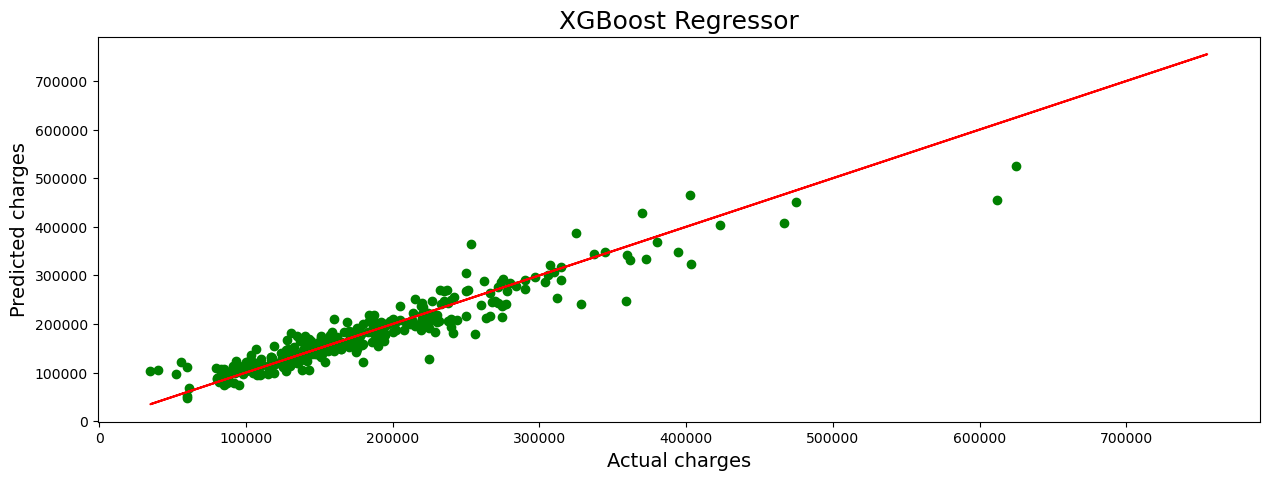

In [131]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('XGBoost Regressor',fontsize=18)
plt.show()

<span class="burk">k-nearest neighbors (KNN)</span>

In [132]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [133]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.8534033664108981
At random state 0,the testing accuracy is:0.6612470529095025


At random state 1,the training accuracy is:0.8184293174912819
At random state 1,the testing accuracy is:0.7571249028987074


At random state 2,the training accuracy is:0.8470549594528199
At random state 2,the testing accuracy is:0.687634751273347


At random state 3,the training accuracy is:0.816259865675923
At random state 3,the testing accuracy is:0.7630284319730999


At random state 4,the training accuracy is:0.8158759948109283
At random state 4,the testing accuracy is:0.7474240670209962


At random state 5,the training accuracy is:0.8438792992148454
At random state 5,the testing accuracy is:0.6738126321908879


At random state 6,the training accuracy is:0.8154447038170716
At random state 6,the testing accuracy is:0.7708903327350713


At random state 7,the training accuracy is:0.8396203797547432
At random state 7,the testing accuracy is:0.7034601748537008


At

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=74)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [135]:
pred=knn.predict(x_test)

In [136]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

Actual  Predicted
823  120500   120380.0
902   97000    99700.0
903  145000   131551.6
795  107000   127900.0
535  157900   141390.0

In [137]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 21576.032478632478
Mean squared error: 853157344.5457551
Root mean squared error: 29208.857296131173


In [138]:
predict_test=knn.predict(x_test)
print(r2_score(y_test,predict_test)*100)

81.81449423787076


In [139]:
predict_train=knn.predict(x_train)
print(r2_score(y_train,predict_train)*100)

81.60799145180421


The Cross validation score for k-nearest neighbors (KNN) model

In [140]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.7348250914784015 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.7346952477046518 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.7426066221710337 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.7379446075355829 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.745652851629671 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.7361629351248679 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score

Since the number dont have such impact on the accuracy and cv_score.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

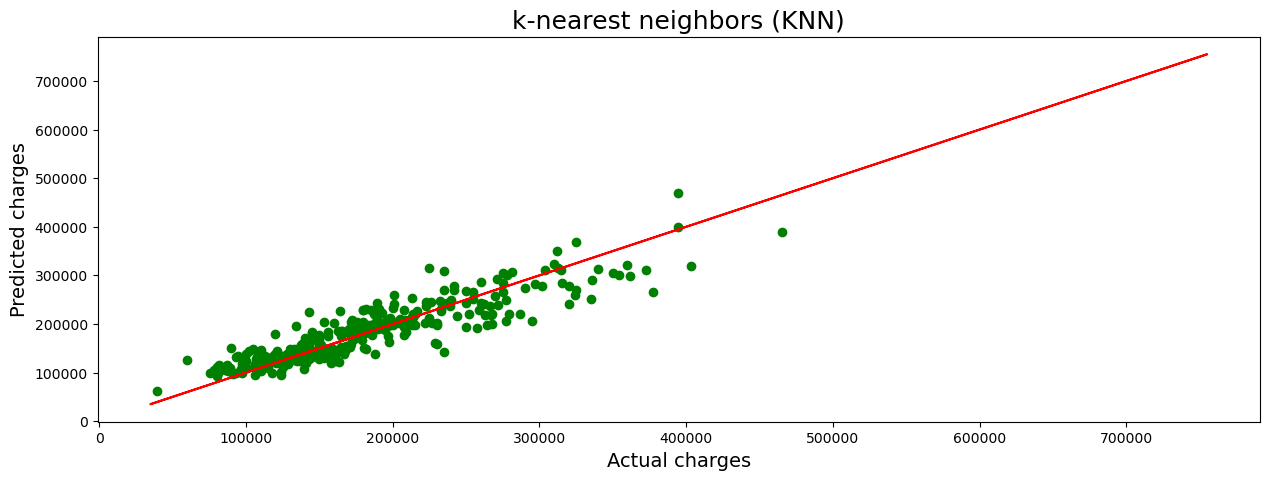

In [141]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('k-nearest neighbors (KNN)',fontsize=18)
plt.show()

<span class="burk">Hyper Parameter Tuning</span>

In [142]:
from sklearn.model_selection import GridSearchCV

Ensemble Technique

In [143]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'random_state': 8}


In [144]:
rdr=RandomForestRegressor(criterion='mae',max_features='auto',random_state=8)
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 86.79417521156296
Cross Val Score: 84.6832604168003


We are getting model accuracy and cross validation respectively.

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
parameters = {"max_depth": [4, 5, 6],"learning_rate": [0.005, 0.009, 0.01],
                         "n_estimators": [700, 1000, 2500]}
xgb=XGBRegressor()
clf=GridSearchCV(xgb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.009, 'max_depth': 4, 'n_estimators': 2500}


In [146]:
xgb=GradientBoostingRegressor(max_depth=4,learning_rate=0.009,n_estimators=2500)
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_decision=xgb.predict(x_test)
xgbs=r2_score(y_test,pred_decision)
print('R2 Score:',xgbs*100)
xgbscore=cross_val_score(xgb,x,y,cv=5)
xgbc=xgbscore.mean()
print('Cross Val Score:',xgbc*100)

R2 Score: 89.19765528018878
Cross Val Score: 86.55239348000794


We are getting model accuracy and cross validation respectively.which shows our model is performing well

<span class="burk">Analysis and Comparision</span>

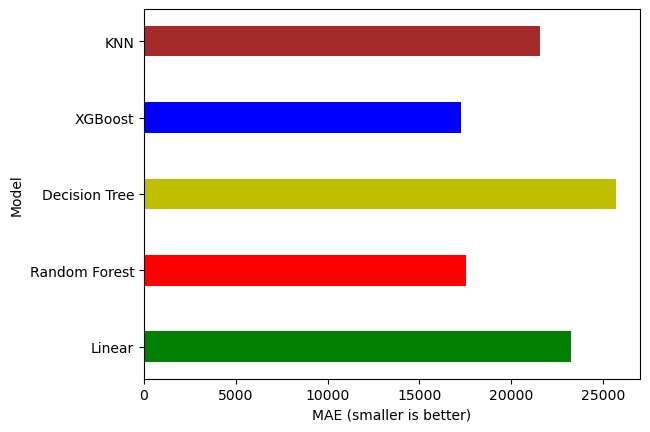

In [147]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost', 'KNN']
y = [23292.08, 17556.97 , 25741.56, 17275.81, 21576.03]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MAE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that XGBoost model has the smallest MAE, 17,275.81 followed by Random Forest model with a little larger error of 17556.97. After that, K-Nearest Neighbors come with error of 21,576.03.At last, the linear and Decision Tree model comes with an similar errors: 23,292.08 and 25,741.56 respectively.

So, In our experiment, the best model is XGBoost model and the worst model is Decision Tree model. We can see that the difference in MAE between the best model and the worst model is significant; the best model has almost 30 % of the error of the worst model.

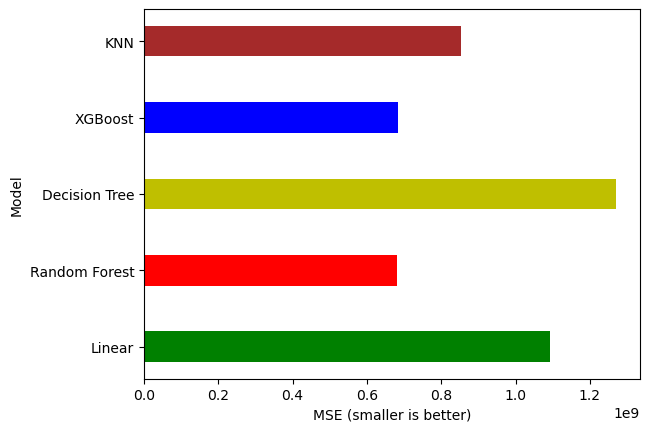

In [148]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost', 'KNN']
y = [1092376863.42, 681447503.74, 1271277570.76, 683514616.46, 853157344.54]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MSE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Random Forest model has the smallest RMSE, 26,104.54 followed by XGBoost with a little larger error of 26,144.11. After that, K-Nearest Neighbors come with error of 29,208.85.At last, the linear and Decision tree model comes with an similar errors: 33,051.12 and 35,654.97 respectively.

So, in our experiment, the best model is Random Forest and the worst model is Decision Tree model. We can see that the difference in MSE between the best model and the worst model is significant; the best model has almost 25 % of the error of the worst model.

Finally,we came to know that our best model is both XGBoost and Random Forest,then the worst model is Decision Tree.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

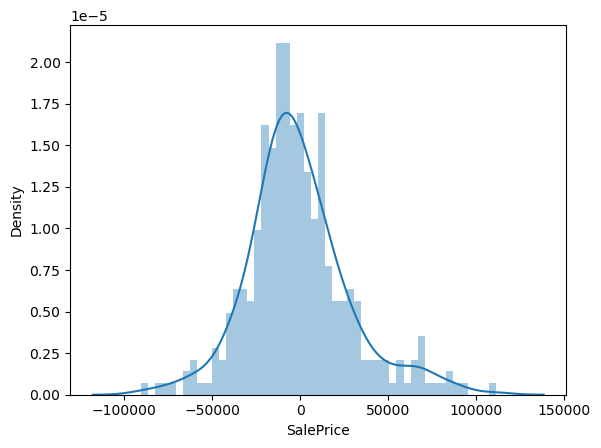

In [149]:
#Distploy Display distribution of data across all level of category.
sns.distplot((y_test-predict_test),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

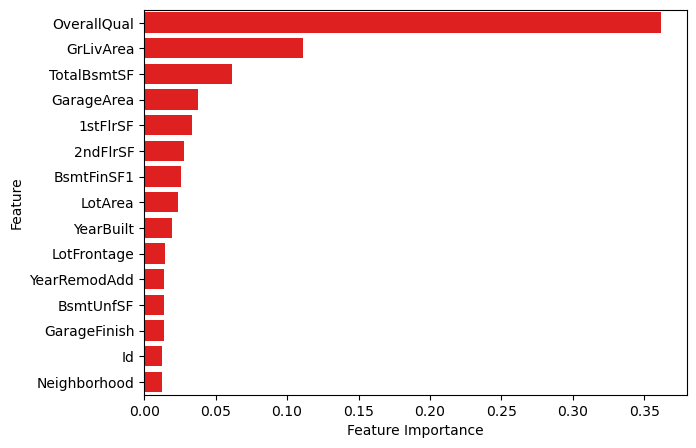

In [150]:
rdr_feature_importances = rdr.feature_importances_
rdr_feature_importances = pd.Series(rdr_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rdr_feature_importances, y=rdr_feature_importances.index, color="r");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

Let's discover the most important features as determined by XGBoost Regression:

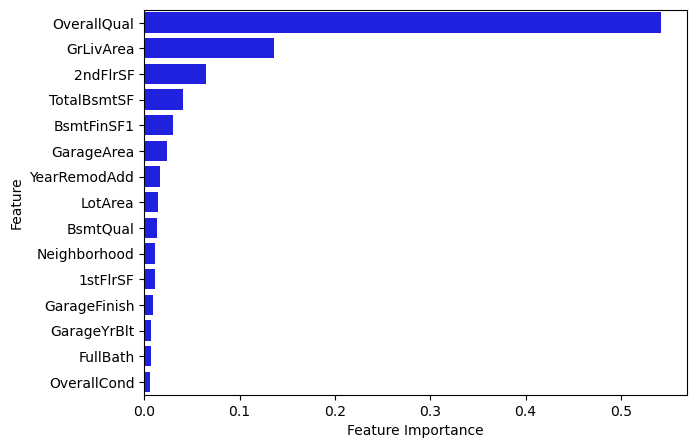

In [151]:
xgb_feature_importances = xgb.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=xgb_feature_importances, y=xgb_feature_importances.index, color="b");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

Common Important Features

Now, let us see which features are among the most important features for both Decision Tree and Random Forest models, and let's find out the difference in their importance regarding the two models:

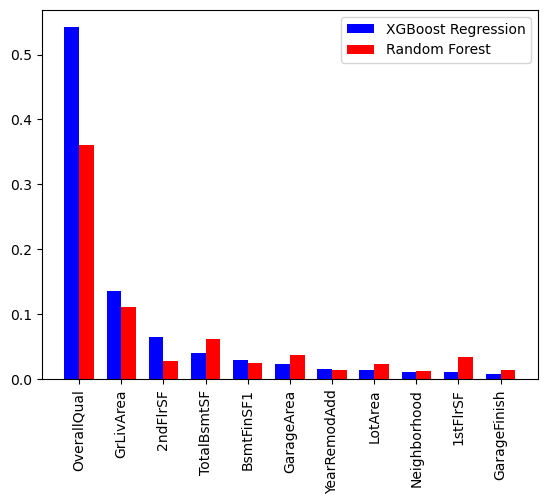

In [152]:
common_imp_feat = [x for x in xgb_feature_importances.index 
                   if x in rdr_feature_importances.index]
commImpFeat_xgb = [xgb_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_rdr = [rdr_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb, width,
       color='b', label='XGBoost Regression');
ax.bar(ind + width/2, commImpFeat_rdr, width, 
       color='r', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);

<span class="girk">Compare with Actual Final Vs Sample Prediction</span>:

Y Test  Prediction
823  120500    120380.0
902   97000     99700.0
903  145000    131551.6
795  107000    127900.0
535  157900    141390.0

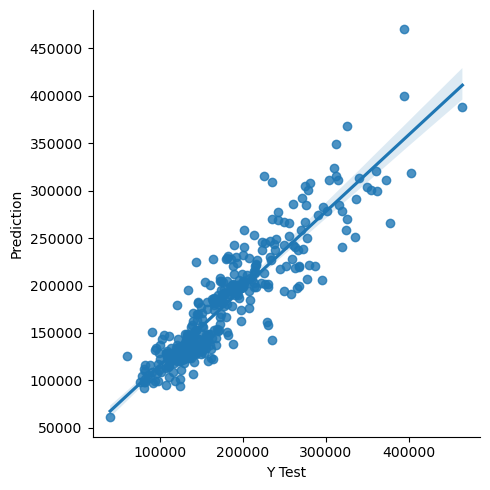

In [153]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

<span class="burk">Model Saving</span>

In [154]:
import pickle
filename='Housing Price Prediction.pkl'
pickle.dump(xgb, open(filename, 'wb'))

<span class="burk">Conclusion</span>

In [155]:
loaded_model = pickle.load(open('Housing Price Prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

89.19765528018878


In [156]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

0              1              2             3              4              5              6              7              8              9              10             11             12             13             14            15             16             17             18             19            20             21            22             23             24             25             26             27             28             29             30            31             32             33             34             35             36             37             38             39            40             41             42             43             44             45             46             47             48             49             50             51             52             53             54             55             56             57             58             59             60            61             62             63           64             65   \
Predicted  113557.217779  109817.019748  169449.620245  91794.050179  154011.175478  137420.862056  149271.096313  315537.504588  171101.095115  170835.876031  270613.562234  168116.856257  161578.147764  285792.095024  115380.173307  116481.56986  133180.806912  127816.452941  192686.619329  137386.287267  125825.60554  226031.416731  218192.52412  125784.939033  157377.337569  127237.863027  149462.271111  131117.114395  140163.611711  140776.672443  241328.968206  213376.33257  117733.259056  234785.165874  127584.372323  128687.562983  178764.337211  203500.551424  142992.852709  159053.093522  200701.59741  339557.405371  198091.651018  108440.893067  133693.211356  243107.720911  113728.688195  130021.071679  127231.884232  156090.565871  219004.110099  260463.233567  144705.229163  199394.576831  296978.123291  257310.913631  126317.186214  238436.368713  131021.139589  212165.174123  172960.694636  99491.535609  146017.000503  344431.623022  86082.86416  138483.945287   
Original   113557.217779  109817.019748  169449.620245  91794.050179  154011.175478  137420.862056  149271.096313  315537.504588  171101.095115  170835.876031  270613.562234  168116.856257  161578.147764  285792.095024  115380.173307  116481.56986  133180.806912  127816.452941  192686.619329  137386.287267  125825.60554  226031.416731  218192.52412  125784.939033  157377.337569  127237.863027  149462.271111  131117.114395  140163.611711  140776.672443  241328.968206  213376.33257  117733.259056  234785.165874  127584.372323  128687.562983  178764.337211  203500.551424  142992.852709  159053.093522  200701.59741  339557.405371  198091.651018  108440.893067  133693.211356  243107.720911  113728.688195  130021.071679  127231.884232  156090.565871  219004.110099  260463.233567  144705.229163  199394.576831  296978.123291  257310.913631  126317.186214  238436.368713  131021.139589  212165.174123  172960.694636  99491.535609  146017.000503  344431.623022  86082.86416  138483.945287   

                     66             67             68            69             70             71             72            73             74             75             76             77           78             79             80             81            82             83            84             85             86             87             88             89             90             91             92             93             94             95            96             97             98            99             100            101           102            103            104            105            106            107            108            109            110            111            112           113            114            115            116            117            118            119           120            121            122            123            124            125            126            127            128           129           130            131  \
Predicted  236366.480595  337349.609511  150018.

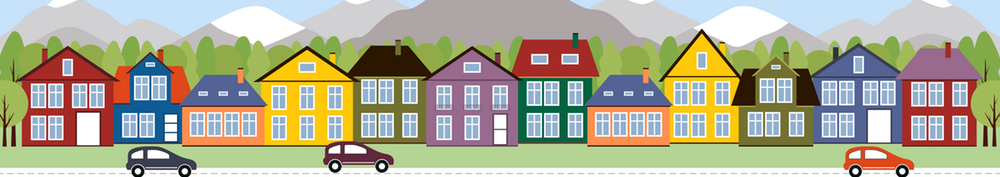